In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

In [2]:
# 発現データ
tpm = pd.read_csv("../Cyclum/old-version/data/mESC/mesc-tpm.csv", sep="\t")
tpm = tpm.rename(columns={ "Unnamed: 0" : "Gene name" }).set_index("Gene name")
tpm

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
Gene name,,,,,,,,,,,,,,,,,,,,,
Gnai3,13.317399,20.809909,1.311230,0.000000,0.498320,32.602171,8.881169,192.509501,6.735197,57.545510,...,120.440690,380.763301,63.764869,0.000000,23.376951,92.946529,251.601111,0.000000,1.176739,179.582025
Pbsn,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cdc45,41.956837,231.003887,3.991818,306.523439,51.200460,20.534851,19.864074,2.056360,109.811189,239.124604,...,0.000000,0.000000,280.152369,0.000000,99.863597,93.915521,2.311077,21.340079,0.000000,0.000000
H19,28.725794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scml2,0.208431,0.000000,0.000000,0.000000,0.000000,98.608639,0.365937,0.000000,11.885863,0.000000,...,29.966089,3.510291,0.000000,1.260417,0.000000,0.000000,12.553475,1.451549,1.187907,6.578939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gm11392,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC160109.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.326400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC154675.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
# 遺伝子数でフィルタリング

cell_few_genes = []
for column in tpm.columns:
    if len(tpm[column].value_counts()) < 500:
        cell_few_genes.append(column)
        
cell_few_genes

['S_cell1_count',
 'S_cell5_count',
 'S_cell18_count',
 'S_cell31_count',
 'S_cell44_count',
 'S_cell58_count',
 'S_cell71_count',
 'S_cell84_count']

In [4]:
# 細胞数でフィルタリング

gene_few_cells = []
for gene in tpm.T.columns:
    if len(tpm.T[gene].value_counts()) < 5:
        gene_few_cells.append(gene)

#gene_few_cells

In [5]:
tpm_cell_filtered = tpm.drop(cell_few_genes, axis=1)
tpm_cell_filtered

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
Gene name,,,,,,,,,,,,,,,,,,,,,
Gnai3,13.317399,20.809909,1.311230,0.000000,0.498320,32.602171,8.881169,192.509501,6.735197,57.545510,...,120.440690,380.763301,63.764869,0.000000,23.376951,92.946529,251.601111,0.000000,1.176739,179.582025
Pbsn,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cdc45,41.956837,231.003887,3.991818,306.523439,51.200460,20.534851,19.864074,2.056360,109.811189,239.124604,...,0.000000,0.000000,280.152369,0.000000,99.863597,93.915521,2.311077,21.340079,0.000000,0.000000
H19,28.725794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scml2,0.208431,0.000000,0.000000,0.000000,0.000000,98.608639,0.365937,0.000000,11.885863,0.000000,...,29.966089,3.510291,0.000000,1.260417,0.000000,0.000000,12.553475,1.451549,1.187907,6.578939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gm11392,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC160109.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.326400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC154675.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
tpm_cell_gene_filtered = tpm_cell_filtered.drop(gene_few_cells, axis=0)
tpm_cell_gene_filtered

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
Gene name,,,,,,,,,,,,,,,,,,,,,
Gnai3,13.317399,20.809909,1.311230,0.000000,0.498320,32.602171,8.881169,192.509501,6.735197,57.545510,...,120.440690,380.763301,63.764869,0.000000,23.376951,92.946529,251.601111,0.000000,1.176739,179.582025
Cdc45,41.956837,231.003887,3.991818,306.523439,51.200460,20.534851,19.864074,2.056360,109.811189,239.124604,...,0.000000,0.000000,280.152369,0.000000,99.863597,93.915521,2.311077,21.340079,0.000000,0.000000
H19,28.725794,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scml2,0.208431,0.000000,0.000000,0.000000,0.000000,98.608639,0.365937,0.000000,11.885863,0.000000,...,29.966089,3.510291,0.000000,1.260417,0.000000,0.000000,12.553475,1.451549,1.187907,6.578939
Narf,0.000000,3.578780,0.000000,9.003656,0.000000,2.781329,0.672619,0.668453,0.000000,1.870541,...,0.000000,0.483913,3.226823,0.000000,1.399237,1.419943,6.922263,0.000000,225.333026,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP23-345J21.2,0.000000,0.000000,0.766529,0.000000,0.000000,0.547668,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC122013.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.821084,0.000000,...,0.000000,0.000000,0.823320,0.000000,0.000000,1.109533,0.215641,0.000000,0.000000,0.000000
AC132389.1,0.000000,0.000000,0.416478,286.411820,0.000000,82.127740,0.000000,0.357577,9.032436,22.013461,...,8.114670,1.035442,0.000000,0.000000,0.000000,0.253191,0.000000,0.000000,0.934402,0.000000


In [159]:
# 対数変換
log_transformation = lambda x: np.log(x+1)
tpm_filtered_log = tpm_cell_gene_filtered.apply(log_transformation)
tpm_filtered_log

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
Gene name,,,,,,,,,,,,,,,,,,,,,
Gnai3,2.661475,3.082364,0.837780,0.000000,0.404344,3.514591,2.290631,5.265327,2.045781,4.069804,...,4.799426,5.944801,4.170763,0.000000,3.193638,4.542726,5.531812,0.000000,0.777828,5.196185
Cdc45,3.760196,5.446754,1.607800,5.728551,3.955091,3.069673,3.038029,1.117225,4.707828,5.481158,...,0.000000,0.000000,5.638897,0.000000,4.613769,4.552987,1.197273,3.106382,0.000000,0.000000
H19,3.392015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scml2,0.189323,0.000000,0.000000,0.000000,0.000000,4.601249,0.311841,0.000000,2.556131,0.000000,...,3.432893,1.506362,0.000000,0.815549,0.000000,0.000000,2.606643,0.896720,0.782945,2.025373
Narf,0.000000,1.521433,0.000000,2.302951,0.000000,1.330076,0.514391,0.511897,0.000000,1.054500,...,0.000000,0.394683,1.441451,0.000000,0.875151,0.883744,2.069677,0.000000,5.422007,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP23-345J21.2,0.000000,0.000000,0.569017,0.000000,0.000000,0.436749,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC122013.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.381496,0.000000,...,0.000000,0.000000,0.600659,0.000000,0.000000,0.746467,0.195272,0.000000,0.000000,0.000000
AC132389.1,0.000000,0.000000,0.348174,5.660916,0.000000,4.420378,0.000000,0.305701,2.305823,3.136079,...,2.209885,0.710713,0.000000,0.000000,0.000000,0.225693,0.000000,0.000000,0.659798,0.000000


(array([1.4308e+04, 1.6290e+03, 1.5660e+03, 1.5700e+03, 1.7380e+03,
        1.0870e+03, 4.6200e+02, 1.2800e+02, 2.6000e+01, 1.1000e+01]),
 array([0.        , 0.96547239, 1.93094479, 2.89641718, 3.86188957,
        4.82736196, 5.79283436, 6.75830675, 7.72377914, 8.68925153,
        9.65472393]),
 <a list of 10 Patch objects>)

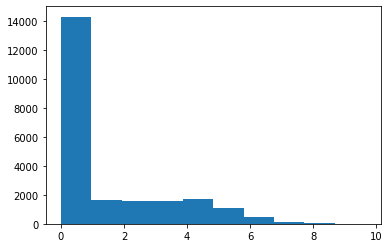

In [8]:
# 対数変換後のTPMの分布を1細胞ごとに確認
plt.hist(tpm_filtered_log["G2M_cell3_count"])

In [9]:
# 1細胞におけるTPMの総和はだいたい同じ（TPMだからそう。一部遺伝子が削られ、対数変換しているので少しずれている）
# for cell in tpm_filtered_log.columns:
#     print(tpm_filtered_log[cell].sum())

In [10]:
# 細胞周期割り当て。まず細胞周期マーカーデータを整理

In [11]:
# ToDo
# ENSPを考慮してマウスのcc gene増やす→done
# フィルタリングが必要→done
# Variable Gene（必要があれば論文を読む）
# 細胞周期割り当て
# もう一度PCA

# 遺伝子もマーカーから割り当ててみる

# Rotation
# peak timeの具体的な値ごとに分けるのはどうか

In [12]:
# Cyclebaseのhuman_periodic markers
ccmarker_peak = pd.read_csv("data/human_periodic.tsv", sep="\t")
ccmarker_peak

,organism,gene,rank,peaktime,periodicity_pvalue,regulation_pvalue
0,9606,ENSP00000300093,1,93,3.348000e-20,5.325483e-12
1,9606,ENSP00000380256,2,82,2.304000e-21,8.354622e-11
2,9606,ENSP00000211287,3,93,4.662900e-20,3.099938e-11
3,9606,ENSP00000216911,4,90,9.902880e-19,2.048852e-12
4,9606,ENSP00000316121,5,82,5.384700e-20,6.559567e-11
...,...,...,...,...,...,...
373,9606,ENSP00000263382,390,59,7.026322e-08,4.292481e-01
374,9606,ENSP00000303706,392,38,1.276664e-08,2.453469e+00
375,9606,ENSP00000302961,394,15,4.767742e-07,6.722096e-02
376,9606,ENSP00000389014,395,61,6.709085e-08,5.196355e-01


In [13]:
# Cyclebaseのhuman_periodic with peaktime
cb_human = pd.read_csv("data/cyclebase_human.tsv", sep="\t")
cb_human = cb_human[~cb_human["Peaktime"].str.contains("non-periodic")]
cb_human

,Matched name,Primary name,Type,Identifier,Peaktime,rank,Phenotypes
0,PLK1,PLK1,Homo sapiens gene,ENSP00000300093,M,1,M
1,CCNF,CCNF,Homo sapiens gene,ENSP00000380256,G2,2,NaN
2,MAPK13,MAPK13,Homo sapiens gene,ENSP00000211287,M,3,G1
3,AURKA,AURKA,Homo sapiens gene,ENSP00000216911,M,4,"G2/M, M"
4,CDCA8,CDCA8,Homo sapiens gene,ENSP00000316121,G2,5,"G2/M, M"
...,...,...,...,...,...,...,...
389,ASF1B,ASF1B,Homo sapiens gene,ENSP00000263382,S,390,NaN
391,CDC25A,CDC25A,Homo sapiens gene,ENSP00000303706,G1,392,NaN
393,HSPA4,HSPA4,Homo sapiens gene,ENSP00000302961,G1,394,NaN
394,C5orf42,C5orf42,Homo sapiens gene,ENSP00000389014,S,395,NaN


In [14]:
# G1:59, G1/S:37 ,S:36, G2:111, G2/M:39, M:96,
cb_human[cb_human["Peaktime"]=="G2/M"]


,Matched name,Primary name,Type,Identifier,Peaktime,rank,Phenotypes
9,KPNA2,KPNA2,Homo sapiens gene,ENSP00000332455,G2/M,10,NaN
32,BUB1B,BUB1B,Homo sapiens gene,ENSP00000287598,G2/M,33,NaN
33,TACC3,TACC3,Homo sapiens gene,ENSP00000326550,G2/M,34,"G2/M, M"
38,KIF20B,KIF20B,Homo sapiens gene,ENSP00000260753,G2/M,39,NaN
49,CKAP2,CKAP2,Homo sapiens gene,ENSP00000367276,G2/M,50,NaN
55,BORA,BORA,Homo sapiens gene,ENSP00000375082,G2/M,56,NaN
60,MKI67,MKI67,Homo sapiens gene,ENSP00000357643,G2/M,61,NaN
61,EIF5A2,EIF5A2,Homo sapiens gene,ENSP00000295822,G2/M,62,NaN
65,CIT,CIT,Homo sapiens gene,ENSP00000376306,G2/M,66,"G2/M, M"
75,CENPA,CENPA,Homo sapiens gene,ENSP00000336868,G2/M,76,NaN


In [15]:
unannotated_human_cb = cb_human[cb_human["Matched name"].str.contains("ENSP")]["Matched name"]
unannotated_human_cb

63     ENSP00000363647
99     ENSP00000372746
160    ENSP00000373058
250    ENSP00000373080
Name: Matched name, dtype: object

In [16]:
# humanとmouseのGeneID対応 from Ensembl Biomart
human_to_mouse = pd.read_csv("data/mart_export.txt", sep="\t")
human_to_mouse = human_to_mouse[["Protein stable ID", "Mouse gene stable ID", "Mouse gene name"]]
human_to_mouse

,Protein stable ID,Mouse gene stable ID,Mouse gene name
0,ENSP00000354687,ENSMUSG00000064341,mt-Nd1
1,ENSP00000355046,ENSMUSG00000064345,mt-Nd2
2,ENSP00000354499,ENSMUSG00000064351,mt-Co1
3,ENSP00000354876,ENSMUSG00000064354,mt-Co2
4,ENSP00000355265,ENSMUSG00000064356,mt-Atp8
...,...,...,...
163835,ENSP00000394655,ENSMUSG00000094439,Gm21969
163836,ENSP00000394655,ENSMUSG00000041025,Iffo2
163837,ENSP00000386951,ENSMUSG00000045248,Med26
163838,ENSP00000366509,ENSMUSG00000021327,Zkscan3


In [17]:
human_to_mouse[human_to_mouse["Mouse gene name"]=="a"]

,Protein stable ID,Mouse gene stable ID,Mouse gene name
123057,ENSP00000454804,ENSMUSG00000027596,a
123058,ENSP00000364092,ENSMUSG00000027596,a


In [18]:
# unannotated_humna_cbはhuman_to_mouseになかったので無視して良い
for gene in unannotated_human_cb:
    human_to_mouse[human_to_mouse["Protein stable ID"]==gene]

In [19]:
cb_human.set_index("Matched name")

,Primary name,Type,Identifier,Peaktime,rank,Phenotypes
Matched name,,,,,,
PLK1,PLK1,Homo sapiens gene,ENSP00000300093,M,1,M
CCNF,CCNF,Homo sapiens gene,ENSP00000380256,G2,2,NaN
MAPK13,MAPK13,Homo sapiens gene,ENSP00000211287,M,3,G1
AURKA,AURKA,Homo sapiens gene,ENSP00000216911,M,4,"G2/M, M"
CDCA8,CDCA8,Homo sapiens gene,ENSP00000316121,G2,5,"G2/M, M"
...,...,...,...,...,...,...
ASF1B,ASF1B,Homo sapiens gene,ENSP00000263382,S,390,NaN
CDC25A,CDC25A,Homo sapiens gene,ENSP00000303706,G1,392,NaN
HSPA4,HSPA4,Homo sapiens gene,ENSP00000302961,G1,394,NaN


In [20]:
human_to_mouse

,Protein stable ID,Mouse gene stable ID,Mouse gene name
0,ENSP00000354687,ENSMUSG00000064341,mt-Nd1
1,ENSP00000355046,ENSMUSG00000064345,mt-Nd2
2,ENSP00000354499,ENSMUSG00000064351,mt-Co1
3,ENSP00000354876,ENSMUSG00000064354,mt-Co2
4,ENSP00000355265,ENSMUSG00000064356,mt-Atp8
...,...,...,...
163835,ENSP00000394655,ENSMUSG00000094439,Gm21969
163836,ENSP00000394655,ENSMUSG00000041025,Iffo2
163837,ENSP00000386951,ENSMUSG00000045248,Med26
163838,ENSP00000366509,ENSMUSG00000021327,Zkscan3


In [21]:
# mouse cell cycle marker with peaktime
mouse_cb = pd.merge(cb_human, human_to_mouse, left_on="Identifier", right_on="Protein stable ID")
mouse_cb = mouse_cb[["Mouse gene stable ID", "Mouse gene name", "Peaktime", "rank", "Phenotypes"]]
mouse_cb

,Mouse gene stable ID,Mouse gene name,Peaktime,rank,Phenotypes
0,ENSMUSG00000030867,Plk1,M,1,M
1,ENSMUSG00000072082,Ccnf,G2,2,NaN
2,ENSMUSG00000004864,Mapk13,M,3,G1
3,ENSMUSG00000027496,Aurka,M,4,"G2/M, M"
4,ENSMUSG00000028873,Cdca8,G2,5,"G2/M, M"
...,...,...,...,...,...
355,ENSMUSG00000005470,Asf1b,S,390,NaN
356,ENSMUSG00000032477,Cdc25a,G1,392,NaN
357,ENSMUSG00000020361,Hspa4,G1,394,NaN
358,ENSMUSG00000039801,Cplane1,S,395,NaN


In [22]:
# 重複しているやつら
mouse_cb[mouse_cb.duplicated("Mouse gene stable ID")]

,Mouse gene stable ID,Mouse gene name,Peaktime,rank,Phenotypes
29,ENSMUSG00000055184,Fam72a,G2,28,NaN
226,ENSMUSG00000041219,Arhgap11a,G2,239,NaN
288,ENSMUSG00000050989,Selenon,M,309,NaN


In [23]:
mouse_cb[mouse_cb.duplicated("Mouse gene stable ID", keep="last")]

,Mouse gene stable ID,Mouse gene name,Peaktime,rank,Phenotypes
28,ENSMUSG00000055184,Fam72a,G2,27,NaN
225,ENSMUSG00000041219,Arhgap11a,G2,238,NaN
287,ENSMUSG00000050989,Selenon,M,309,NaN


In [24]:
mouse_cb = mouse_cb.drop_duplicates("Mouse gene stable ID")
mouse_cb

,Mouse gene stable ID,Mouse gene name,Peaktime,rank,Phenotypes
0,ENSMUSG00000030867,Plk1,M,1,M
1,ENSMUSG00000072082,Ccnf,G2,2,NaN
2,ENSMUSG00000004864,Mapk13,M,3,G1
3,ENSMUSG00000027496,Aurka,M,4,"G2/M, M"
4,ENSMUSG00000028873,Cdca8,G2,5,"G2/M, M"
...,...,...,...,...,...
355,ENSMUSG00000005470,Asf1b,S,390,NaN
356,ENSMUSG00000032477,Cdc25a,G1,392,NaN
357,ENSMUSG00000020361,Hspa4,G1,394,NaN
358,ENSMUSG00000039801,Cplane1,S,395,NaN


In [25]:
# aというsymbolのgeneがあることに驚いた。gene nameはnonagouti / humanではASIP(Agouti-signaling protein)
mouse_cb[mouse_cb["Mouse gene name"]=="a"]

,Mouse gene stable ID,Mouse gene name,Peaktime,rank,Phenotypes
261,ENSMUSG00000027596,a,S,280,NaN


In [26]:
# 数数える
# G1:59, G1/S:39, S:30, G2:100, G2/M:40, M:89 →357でok
len(mouse_cb[mouse_cb["Peaktime"]=="M"])

89

In [27]:
mouse_cc_markers = mouse_cb[["Mouse gene name", "Peaktime"]]
mouse_cc_markers

,Mouse gene name,Peaktime
0,Plk1,M
1,Ccnf,G2
2,Mapk13,M
3,Aurka,M
4,Cdca8,G2
...,...,...
355,Asf1b,S
356,Cdc25a,G1
357,Hspa4,G1
358,Cplane1,S


In [28]:
# 357個のmouse cc markerのうち、tpmがあったのは、319個。残りがきになるが一旦先に進む。
# Gene nameがESNPのものを見落としている可能性
hoge = tpm_filtered_log[tpm_filtered_log.index.isin(mouse_cc_markers["Mouse gene name"])].index
mouse_cc_markers = mouse_cc_markers[mouse_cc_markers["Mouse gene name"].isin(hoge)].set_index("Mouse gene name")
mouse_cc_markers

,Peaktime
Mouse gene name,
Plk1,M
Ccnf,G2
Mapk13,M
Aurka,M
Cdca8,G2
...,...
Rpl37,G1
Asf1b,S
Cdc25a,G1


In [160]:
tpm_filtered_log_cc = pd.merge(mouse_cc_markers, tpm_filtered_log, left_index=True, right_index=True)
tpm_filtered_log_cc

,Peaktime,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
Plk1,M,5.349835,1.834312,3.846323,0.000000,6.417861,2.537848,5.450509,2.979093,4.314807,...,1.856949,4.955474,4.882018,0.000000,4.909338,6.088572,5.859144,6.339089,6.414839,7.455843
Ccnf,G2,6.987174,4.310263,4.766342,6.183156,1.596146,4.029321,0.174610,0.387980,2.538306,...,5.476164,3.006474,5.186386,5.612050,5.022657,5.179195,4.367576,0.000000,6.984003,0.000000
Mapk13,M,0.000000,0.000000,3.167084,0.000000,0.000000,2.872715,3.243946,0.000000,3.169600,...,0.000000,0.000000,3.912025,0.000000,2.926993,1.555197,2.617899,0.000000,0.000000,0.000000
Aurka,M,4.841715,4.894397,5.402381,4.190961,0.000000,1.271643,5.408142,4.742632,5.631468,...,5.983443,4.478262,5.637296,4.356283,4.589960,6.201486,5.032231,4.938045,5.205914,0.482407
Cdca8,G2,3.888460,4.313624,4.274166,4.497292,5.742283,4.175437,3.803114,4.106120,5.382816,...,4.986073,0.000000,5.194007,0.000000,2.514006,5.765515,5.746337,4.476775,0.000000,4.459745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rpl37,G1,6.264081,6.869537,6.725937,6.590602,6.542137,6.371105,6.609695,6.417760,6.368647,...,6.716373,5.077973,6.539451,6.198276,6.629516,6.252394,6.278649,5.822366,4.243111,5.110952
Asf1b,S,5.686341,0.870864,4.999634,5.238460,6.039429,4.578794,5.106010,0.000000,5.124626,...,4.057319,7.045483,4.641834,0.760307,5.981018,6.143113,5.260205,1.596339,4.982994,5.942298
Cdc25a,G1,2.993287,4.134055,3.959761,0.546816,0.370473,4.525959,0.151088,2.809464,3.060451,...,0.197989,0.461658,3.150840,5.981222,3.493270,0.000000,2.810259,0.000000,0.722173,0.000000
Hspa4,G1,5.128679,5.620353,5.107819,5.818089,4.557398,6.128331,5.692007,6.281205,5.287537,...,5.828222,5.916952,5.921659,4.679493,5.371253,5.460599,4.363402,1.189456,5.325336,6.116813


In [161]:
tpm_filtered_log_cc_mean = tpm_filtered_log_cc.groupby("Peaktime").mean().reindex(["G1", "G1/S", "S", "G2", "G2/M", "M"])
tpm_filtered_log_cc_mean

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
Peaktime,,,,,,,,,,,,,,,,,,,,,
G1,2.326450,2.843488,2.914953,2.159859,1.811304,2.753235,2.879605,2.820677,2.806525,3.005507,...,2.574965,2.104610,3.157687,2.683358,2.799571,3.339921,3.140644,1.663438,1.758626,2.229308
G1/S,2.950027,2.721813,2.750914,2.082223,2.068631,2.436114,2.481543,2.591398,2.717540,3.246029,...,3.136408,2.234723,3.228428,1.475667,2.962589,2.989979,3.441769,2.447550,2.353745,1.931696
S,2.415424,1.788008,2.939010,2.084269,2.213906,2.417002,2.161284,3.038238,2.663888,2.783923,...,2.763323,2.125958,3.132001,1.741591,2.771916,2.846933,2.939145,1.710781,1.457298,1.850059
G2,2.208706,2.104011,2.519066,1.752424,1.869975,2.643840,2.253789,2.538748,2.598670,2.592899,...,2.756620,1.961420,3.120877,2.051546,2.624072,3.309204,2.902573,1.766132,1.878791,1.944946
G2/M,2.981649,2.667476,2.905839,1.797663,2.638639,2.985756,2.422221,2.999322,2.608365,2.828315,...,3.223432,2.076656,3.131558,1.536540,2.832290,3.590404,3.393382,2.075965,2.049240,2.021670
M,2.427715,2.617830,2.848383,2.270905,2.091949,2.576843,2.536644,2.948599,2.882814,2.953061,...,2.708420,2.067087,3.610102,2.050485,2.688657,3.696560,3.190963,1.530961,2.181292,2.085749


In [162]:
# 細胞周期マーカーの使えそうなやつ
less_corr_markers = []
corr_markers = []
for i in tpm_filtered_log_cc.iterrows():
    peaktime = i[1][0]
    expr = i[1][1:].astype(float)
    mean_expr = tpm_filtered_log_cc_mean[tpm_filtered_log_cc_mean.index==peaktime].loc[peaktime]
    corr = expr.corr(mean_expr)
    if corr <= 0.2:
        less_corr_markers.append(i[0])
    else:
        corr_markers.append(i[0])
    print(corr)
    
less_corr_markers

0.5285398568407584
0.5243523403642939
0.21804895758370332
0.6033722396753949
0.5088383099731035
0.385864047070231
0.549114550639917
0.5527124093958393
0.5453267556945164
0.5288836108526618
0.6013528303651671
0.49814560051912626
0.39361533507332647
0.33212860690964197
0.48243692773699137
0.48374830334243757
0.462364842000825
0.5219945968310099
0.30800535313601696
0.5495963259420288
0.3635979829047336
0.5477472042056427
0.4545036672289869
0.4373664199591341
0.4849141739404274
0.38709804143859455
0.4651482638951734
0.08671896471186949
0.03547598893913867
0.4852340221812423
-0.03391012199673578
0.4818864598706508
0.5138219154742466
0.3104894378814407
0.2802090509353511
0.35930872470606406
0.344408419294013
0.41136719858708504
0.45658327591153375
0.4003460758369077
0.3582199274128147
0.23307539777573147
0.4221288020630944
0.4628258380187913
0.2313714411492306
0.3175196285026022
0.5431669108788453
0.45313717483061416
0.3693776563674911
0.10859950212025232
0.29385243610557843
0.27526585316399

['Fam72a',
 'Lrrc17',
 'Nlrp2',
 'Rrm2',
 'Cdkn2c',
 'Eif5a2',
 'Srd5a1',
 'Mcm4',
 'Ern2',
 'Fen1',
 'Hspa1l',
 'Lbr',
 'Olr1',
 'Hspa8',
 'H1f0',
 'Btnl9',
 'Cks1b',
 'Plag1',
 'Antxr1',
 'Ltbp3',
 'Bmp2',
 'BC048507',
 'Dynll1',
 'Mboat1',
 'Opn3',
 'Golga2',
 'Lrif1',
 'Nnmt',
 'Insig2',
 'Aoc2',
 'Arglu1',
 'Paqr4',
 'Rad51c',
 'Etv4',
 'Dnmt3b',
 'Vps25',
 'Rad51ap1',
 'Rhpn1',
 'Stat1',
 'Stat5b',
 'Tmed7',
 'Ddx58',
 'Zc3h3',
 'Slc1a3',
 'Runx1',
 'a',
 'Polq',
 'Tubd1',
 'Wdr90',
 'Nasp',
 'Ifit2',
 'Gclm',
 'Gas1',
 'Msh5',
 'Plcxd1',
 'Ubr5',
 'Fam102b',
 'Zwint',
 'Cdh24',
 'Larp1',
 'Gse1',
 'Slc25a29',
 'Actr2',
 'Nr2f6',
 'Arl4a',
 'Ccne2',
 'Mgat2',
 'Hint3',
 'Ier5',
 'Zfp248',
 'Sgcd',
 'Asxl1',
 'Zfp521',
 'Il7r',
 'Fam189b',
 'Ncoa3',
 'Cdkl5',
 'Ahi1',
 'Xpr1']

In [163]:
print(len(less_corr_markers))
print(len(corr_markers))

79
240


In [164]:
mouse_cc_markers_corr = mouse_cc_markers[mouse_cc_markers.index.isin(corr_markers)]
mouse_cc_markers_corr

,Peaktime
Mouse gene name,
Plk1,M
Ccnf,G2
Mapk13,M
Aurka,M
Cdca8,G2
...,...
Smad3,G2/M
Rpl37,G1
Asf1b,S


In [165]:
tpm_filtered_log_cc_corr = pd.merge(mouse_cc_markers_corr, tpm_filtered_log, left_index=True, right_index=True)
tpm_filtered_log_cc_corr

,Peaktime,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
Plk1,M,5.349835,1.834312,3.846323,0.000000,6.417861,2.537848,5.450509,2.979093,4.314807,...,1.856949,4.955474,4.882018,0.000000,4.909338,6.088572,5.859144,6.339089,6.414839,7.455843
Ccnf,G2,6.987174,4.310263,4.766342,6.183156,1.596146,4.029321,0.174610,0.387980,2.538306,...,5.476164,3.006474,5.186386,5.612050,5.022657,5.179195,4.367576,0.000000,6.984003,0.000000
Mapk13,M,0.000000,0.000000,3.167084,0.000000,0.000000,2.872715,3.243946,0.000000,3.169600,...,0.000000,0.000000,3.912025,0.000000,2.926993,1.555197,2.617899,0.000000,0.000000,0.000000
Aurka,M,4.841715,4.894397,5.402381,4.190961,0.000000,1.271643,5.408142,4.742632,5.631468,...,5.983443,4.478262,5.637296,4.356283,4.589960,6.201486,5.032231,4.938045,5.205914,0.482407
Cdca8,G2,3.888460,4.313624,4.274166,4.497292,5.742283,4.175437,3.803114,4.106120,5.382816,...,4.986073,0.000000,5.194007,0.000000,2.514006,5.765515,5.746337,4.476775,0.000000,4.459745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Smad3,G2/M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.641334,4.652382,0.000000,0.000000,0.000000
Rpl37,G1,6.264081,6.869537,6.725937,6.590602,6.542137,6.371105,6.609695,6.417760,6.368647,...,6.716373,5.077973,6.539451,6.198276,6.629516,6.252394,6.278649,5.822366,4.243111,5.110952
Asf1b,S,5.686341,0.870864,4.999634,5.238460,6.039429,4.578794,5.106010,0.000000,5.124626,...,4.057319,7.045483,4.641834,0.760307,5.981018,6.143113,5.260205,1.596339,4.982994,5.942298
Cdc25a,G1,2.993287,4.134055,3.959761,0.546816,0.370473,4.525959,0.151088,2.809464,3.060451,...,0.197989,0.461658,3.150840,5.981222,3.493270,0.000000,2.810259,0.000000,0.722173,0.000000


In [166]:
tpm_filtered_log_cc_corr_mean = tpm_filtered_log_cc_corr.groupby("Peaktime").mean().reindex(["G1", "G1/S", "S", "G2", "G2/M", "M"])
tpm_filtered_log_cc_corr_mean

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
Peaktime,,,,,,,,,,,,,,,,,,,,,
G1,2.573397,3.476159,3.430100,2.580620,1.873173,3.428954,3.675851,3.598023,3.559968,3.904994,...,3.124926,2.404519,3.954640,3.501091,3.569376,4.161460,3.867926,1.980112,1.944292,2.819064
G1/S,2.904590,2.965586,3.080071,2.270063,2.071662,2.634946,2.724860,2.906045,3.040069,3.676693,...,3.504543,2.372484,3.714031,1.350047,3.390337,3.340967,3.951822,2.655431,2.446364,2.012664
S,2.387165,1.741455,3.307780,2.097562,2.318501,2.573772,2.249822,3.256129,2.931137,3.089806,...,2.901835,2.148352,3.298625,1.589199,3.073908,3.007954,3.322296,1.539442,1.236648,1.817754
G2,2.643702,2.463366,3.001231,2.103833,2.328166,3.052087,2.658819,3.100618,3.136395,3.141512,...,3.324542,2.288802,3.744619,2.466382,3.105233,4.029968,3.478916,2.274154,2.142592,2.277656
G2/M,3.376961,2.787842,3.150877,1.811909,3.020974,3.417933,2.407538,3.211018,2.931976,3.254398,...,3.488674,2.256200,3.596089,1.719720,3.069923,4.126139,3.858644,2.244375,2.154186,2.264186
M,2.744410,2.952652,3.241270,2.522536,2.307579,2.832405,2.828223,3.385465,3.228229,3.377852,...,3.048829,2.340599,4.108235,2.312170,3.054745,4.133614,3.703962,1.693338,2.530465,2.252074


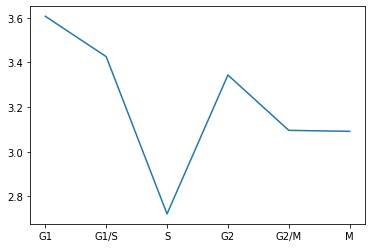

In [36]:
plt.plot(tpm_filtered_log_cc_corr_mean["G1_cell15_count"])

In [167]:
max_phase = []
for i in tpm_filtered_log_cc_corr_mean.iteritems():
    expr = i[1][1:]    
    max_phase.append(expr.index[np.argmax(i[1][1:])])

In [168]:
max_phase_df = pd.DataFrame(max_phase).T
max_phase_df.columns = tpm_filtered_log_cc_corr_mean.columns
max_phase_df.index = ["phase"]
max_phase_df

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
phase,G2/M,G1/S,S,M,G2/M,G2/M,M,M,M,G1/S,...,G1/S,G1/S,M,G2,G1/S,M,G1/S,G1/S,M,G2


In [169]:
tpm_filtered_log_cc_corr_mean_phase = pd.concat([tpm_filtered_log_cc_corr_mean, max_phase_df])
tpm_filtered_log_cc_corr_mean_phase

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
G1,2.5734,3.47616,3.4301,2.58062,1.87317,3.42895,3.67585,3.59802,3.55997,3.90499,...,3.12493,2.40452,3.95464,3.50109,3.56938,4.16146,3.86793,1.98011,1.94429,2.81906
G1/S,2.90459,2.96559,3.08007,2.27006,2.07166,2.63495,2.72486,2.90605,3.04007,3.67669,...,3.50454,2.37248,3.71403,1.35005,3.39034,3.34097,3.95182,2.65543,2.44636,2.01266
S,2.38717,1.74146,3.30778,2.09756,2.3185,2.57377,2.24982,3.25613,2.93114,3.08981,...,2.90183,2.14835,3.29863,1.5892,3.07391,3.00795,3.3223,1.53944,1.23665,1.81775
G2,2.6437,2.46337,3.00123,2.10383,2.32817,3.05209,2.65882,3.10062,3.1364,3.14151,...,3.32454,2.2888,3.74462,2.46638,3.10523,4.02997,3.47892,2.27415,2.14259,2.27766
G2/M,3.37696,2.78784,3.15088,1.81191,3.02097,3.41793,2.40754,3.21102,2.93198,3.2544,...,3.48867,2.2562,3.59609,1.71972,3.06992,4.12614,3.85864,2.24438,2.15419,2.26419
M,2.74441,2.95265,3.24127,2.52254,2.30758,2.83241,2.82822,3.38547,3.22823,3.37785,...,3.04883,2.3406,4.10824,2.31217,3.05474,4.13361,3.70396,1.69334,2.53047,2.25207
phase,G2/M,G1/S,S,M,G2/M,G2/M,M,M,M,G1/S,...,G1/S,G1/S,M,G2,G1/S,M,G1/S,G1/S,M,G2


In [170]:
# ↑細胞周期割り当て終了
# 発現変動遺伝子の同定

In [171]:
tpm_filtered_log

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
Gene name,,,,,,,,,,,,,,,,,,,,,
Gnai3,2.661475,3.082364,0.837780,0.000000,0.404344,3.514591,2.290631,5.265327,2.045781,4.069804,...,4.799426,5.944801,4.170763,0.000000,3.193638,4.542726,5.531812,0.000000,0.777828,5.196185
Cdc45,3.760196,5.446754,1.607800,5.728551,3.955091,3.069673,3.038029,1.117225,4.707828,5.481158,...,0.000000,0.000000,5.638897,0.000000,4.613769,4.552987,1.197273,3.106382,0.000000,0.000000
H19,3.392015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scml2,0.189323,0.000000,0.000000,0.000000,0.000000,4.601249,0.311841,0.000000,2.556131,0.000000,...,3.432893,1.506362,0.000000,0.815549,0.000000,0.000000,2.606643,0.896720,0.782945,2.025373
Narf,0.000000,1.521433,0.000000,2.302951,0.000000,1.330076,0.514391,0.511897,0.000000,1.054500,...,0.000000,0.394683,1.441451,0.000000,0.875151,0.883744,2.069677,0.000000,5.422007,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP23-345J21.2,0.000000,0.000000,0.569017,0.000000,0.000000,0.436749,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC122013.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.381496,0.000000,...,0.000000,0.000000,0.600659,0.000000,0.000000,0.746467,0.195272,0.000000,0.000000,0.000000
AC132389.1,0.000000,0.000000,0.348174,5.660916,0.000000,4.420378,0.000000,0.305701,2.305823,3.136079,...,2.209885,0.710713,0.000000,0.000000,0.000000,0.225693,0.000000,0.000000,0.659798,0.000000


In [172]:
ave_exprs = {}
for gene in tpm_filtered_log.iterrows():
    #print(gene[1])
    expr_sum = 0
    for count in gene[1]:
        #print(cell)
        expr_sum += np.exp(count)
    ave_expr = np.log(expr_sum / len(gene[1]))
    ave_exprs[gene[0]] = ave_expr

aves = {}
for gene in tpm_cell_gene_filtered.iterrows():
    expr_sum = 0
    for count in gene[1]:
        expr_sum += count
    ave_expr = expr_sum / len(gene[1])
    aves[gene[0]] = ave_expr
#aves    
    
#ave_exprs    
var_exprs = {}
for gene in tpm_cell_gene_filtered.iterrows():
    mse_sum = 0
    for count in gene[1]:
        mse_sum += (count - aves[gene[0]]) ** 2
    mse_ave = mse_sum / len(gene[1])
    var_exprs[gene[0]] = np.log(mse_ave / aves[gene[0]])
var_exprs

{'Gnai3': 4.774971525632974,
 'Cdc45': 4.988315405183537,
 'H19': 5.338431638849377,
 'Scml2': 3.9716155385343224,
 'Narf': 4.577368765016889,
 'Klf6': 4.112489832747066,
 'Scmh1': 4.350319279420703,
 'Cox5a': 4.94323025675549,
 'Tbx2': 0.5785715012764294,
 'Tbx4': 4.713691606668615,
 'Ngfr': 4.669837735253436,
 'Wnt3': 3.0292610737654404,
 'Wnt9a': 0.5790213641089181,
 'Fer': 4.656712984737864,
 'Xpo6': 4.701071727267216,
 'Tfe3': 3.7021960672214003,
 'Axin2': 2.6045512122324723,
 'Baat1': 4.635891924551972,
 'Gna12': 4.378290529789607,
 'Slc22a18': 4.815037309362614,
 'Pih1d2': 3.1840233841275762,
 'Dlat': 3.7999714847149613,
 'Sdhd': 5.388578271830577,
 'Fgf23': 0.48335246643032564,
 'Ccnd2': 3.898527729274757,
 'Gpr107': 3.5663820964278883,
 'Nalcn': 2.3722562981837725,
 'Slfn4': 3.7352321825121906,
 'Th': 4.625859462255005,
 'Drp2': 3.5076747299424125,
 'Tspan32': 5.039635299129346,
 'Lhx2': 2.224928472334469,
 'Gmpr': 5.365551895312219,
 'Glra1': -0.4976361735746852,
 'Mid2': -1.

In [173]:
n_bucket = 20
min_expr = min(ave_exprs.values())
max_expr = max(ave_exprs.values())
print(min_expr)
print(max_expr)
step_size = (max_expr - min_expr) / n_bucket


bucket2gene = {}
gene2bucket = {}
for i in range(1,n_bucket+1):
    bucket2gene[i] = []
for gene in ave_exprs:
    for i in range(1,n_bucket+1): 
        if min_expr + (i-1) * step_size <= ave_exprs[gene] and ave_exprs[gene] <= min_expr + i * step_size:
            bucket2gene[i].append(gene)
            gene2bucket[gene] = i

0.0007820649863168371
9.853352726475773


In [174]:
normalized_ds = {}
for gene in var_exprs:
    d = var_exprs[gene]
    bucket_num = gene2bucket[gene]
    genes_in_the_bucket = bucket2gene[bucket_num]
    sm = 0
    for gene_in_the_bucket in genes_in_the_bucket:
        sm += var_exprs[gene_in_the_bucket]
    sm = sm / len(genes_in_the_bucket)
    mse_sm  = 0
    for gene_in_the_bucket in genes_in_the_bucket:
        mse_sm += (var_exprs[gene_in_the_bucket] - sm) ** 2
    mse_sm = mse_sm / len(genes_in_the_bucket)
    normalized_d = (d-sm) / math.sqrt(mse_sm)
    normalized_ds[gene] = normalized_d


In [175]:
normalized_ds

{'Gnai3': 0.3563508323083195,
 'Cdc45': 0.5337412489780603,
 'H19': 1.2686909967183406,
 'Scml2': -0.11196387713834394,
 'Narf': 0.5085197791095889,
 'Klf6': -0.14225810778771755,
 'Scmh1': 0.2759490080218544,
 'Cox5a': 0.2536268077297762,
 'Tbx2': -0.7378046543551525,
 'Tbx4': 0.6732555837980657,
 'Ngfr': 0.6326743667549941,
 'Wnt3': 0.8172804657333812,
 'Wnt9a': -0.7375191938852761,
 'Fer': 0.39472479296705026,
 'Xpo6': 0.4500734774928608,
 'Tfe3': -0.38793496786672016,
 'Axin2': 0.5477808141092089,
 'Baat1': 0.6427254180353055,
 'Gna12': 0.14808742997036192,
 'Slc22a18': 0.7892531247304129,
 'Pih1d2': -0.1170449815134265,
 'Dlat': -0.4836353458019794,
 'Sdhd': 0.9534168371291986,
 'Fgf23': -0.7982258949319337,
 'Ccnd2': 0.43663444086926917,
 'Gpr107': -0.5270516006527175,
 'Nalcn': 0.4003780714833891,
 'Slfn4': 1.2652544477295844,
 'Th': 1.8304020069393463,
 'Drp2': 1.1208578613854767,
 'Tspan32': 0.9748752880732724,
 'Lhx2': 0.3068911964727134,
 'Gmpr': 1.315869586090208,
 'Glra1':

In [176]:
variable_genes = []
for gene in ave_exprs:
    if 0.2 < ave_exprs[gene] and ave_exprs[gene] < 4 and 0.5 < normalized_ds[gene] and normalized_ds[gene] < 10:
        variable_genes.append(gene)

In [177]:
len(variable_genes)

5636

In [178]:
# 以降面倒なので、vgだけ取り出されたのも同じ名前にする。あとで変える
tpm_filtered_log = tpm_filtered_log[tpm_filtered_log.index.isin(variable_genes)]
tpm_filtered_log

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
Gene name,,,,,,,,,,,,,,,,,,,,,
H19,3.392015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
Narf,0.000000,1.521433,0.000000,2.302951,0.000000,1.330076,0.514391,0.511897,0.000000,1.054500,...,0.000000,0.394683,1.441451,0.0,0.875151,0.883744,2.069677,0.0,5.422007,0.000000
Tbx4,0.000000,3.405964,0.000000,0.000000,0.229343,0.000000,0.171862,0.000000,1.289885,0.000000,...,0.000000,4.054575,0.000000,0.0,0.000000,0.767594,0.000000,0.0,0.000000,5.808893
Ngfr,0.000000,0.215296,0.000000,0.000000,0.211764,0.724736,0.000000,0.000000,1.139495,0.951831,...,3.140308,0.480683,0.330705,0.0,0.000000,4.210686,0.000000,0.0,0.000000,0.294704
Wnt3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC158928.1,0.000000,0.000000,0.000000,0.000000,0.000000,1.238284,0.465253,0.313326,0.218816,0.522631,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.589063,0.0,0.000000,0.780887
AC102575.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
AC154811.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.695543,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [179]:
pca = PCA(n_components=50)
pca.fit(tpm_filtered_log.T)

PCA(n_components=50)

In [180]:
tpm_filtered_log_pca = pd.DataFrame(pca.transform(tpm_filtered_log.T).T)
tpm_filtered_log_pca.columns = tpm_filtered_log.columns
tpm_filtered_log_pca

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
0,17.109708,19.520359,8.656437,23.257109,28.031318,-1.916555,13.607611,6.357333,-1.955336,0.522810,...,7.049797,24.641120,-25.866803,24.488240,-6.567346,-18.835123,-9.964393,29.946250,24.798120,27.089409
1,6.842070,6.287867,4.809837,4.616284,2.425625,13.480283,10.600034,8.254784,5.503396,7.312369,...,-0.370991,1.676523,16.561720,6.330023,11.653287,-1.539757,-1.846980,-0.565017,4.452166,2.563166
2,-3.227593,0.728962,4.437080,-1.214408,-0.524835,32.324649,-0.508723,-4.274269,-2.400517,2.472634,...,-13.280471,-20.159725,-7.931447,-17.247643,-12.847184,-9.783103,-5.965595,-16.342459,-19.392151,-15.765192
3,6.802856,0.024584,-6.816975,-1.681805,-1.318009,-3.972697,1.427302,-1.963232,5.525586,-9.149344,...,4.611468,6.483589,-1.122257,4.034438,1.559808,-3.752389,-0.554879,5.629936,0.689096,6.283130
4,3.886415,5.178714,3.360039,0.996308,3.252300,-8.563123,-4.046301,11.749522,10.641326,13.866828,...,0.533248,-1.154080,8.103584,13.502281,3.923718,-2.786872,5.987894,0.496316,1.445607,-1.492328
5,5.057918,-3.047609,-1.604905,-0.990623,-0.272624,-0.882761,-1.497596,-6.703576,-1.275158,-1.585649,...,2.809058,5.570015,2.956288,7.533494,-0.498468,-2.207909,-1.259164,-1.134201,3.622796,5.511370
6,0.535935,-0.846359,3.602492,1.367857,-2.374852,-8.353068,-4.298425,-0.818569,-6.439198,-4.510436,...,-0.276962,2.503561,-2.854201,-2.037727,-4.932941,-4.973737,4.279086,0.256496,3.394742,6.092659
7,0.531580,3.855336,4.132511,1.643096,-4.395140,-13.421647,5.705159,-1.667009,2.952223,0.466750,...,-10.005666,0.016404,-3.909150,-0.568358,-0.421889,-2.885752,-1.192837,-2.891200,5.685630,-4.532772
8,2.642753,0.468569,0.568218,7.015581,-1.628838,13.372977,-3.256643,0.248001,1.238954,-0.776943,...,-1.196734,-2.378494,2.770665,2.960503,8.456192,3.245198,5.539529,-7.771336,6.548865,-0.075319
9,-1.141662,-5.027949,-6.878063,0.410544,0.313616,17.868660,-2.628440,-0.981193,-0.373515,4.045615,...,8.848138,-4.200658,-2.786624,3.473706,0.966543,-1.605274,-6.998740,-0.538207,-0.039364,0.499263


In [182]:
tpm_filtered_log_pca_phase = pd.concat([tpm_filtered_log_pca, max_phase_df])
tpm_filtered_log_pca_phase

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
0,17.1097,19.5204,8.65644,23.2571,28.0313,-1.91656,13.6076,6.35733,-1.95534,0.52281,...,7.0498,24.6411,-25.8668,24.4882,-6.56735,-18.8351,-9.96439,29.9463,24.7981,27.0894
1,6.84207,6.28787,4.80984,4.61628,2.42562,13.4803,10.6,8.25478,5.5034,7.31237,...,-0.370991,1.67652,16.5617,6.33002,11.6533,-1.53976,-1.84698,-0.565017,4.45217,2.56317
2,-3.22759,0.728962,4.43708,-1.21441,-0.524835,32.3246,-0.508723,-4.27427,-2.40052,2.47263,...,-13.2805,-20.1597,-7.93145,-17.2476,-12.8472,-9.7831,-5.9656,-16.3425,-19.3922,-15.7652
3,6.80286,0.0245844,-6.81697,-1.68181,-1.31801,-3.9727,1.4273,-1.96323,5.52559,-9.14934,...,4.61147,6.48359,-1.12226,4.03444,1.55981,-3.75239,-0.554879,5.62994,0.689096,6.28313
4,3.88642,5.17871,3.36004,0.996308,3.2523,-8.56312,-4.0463,11.7495,10.6413,13.8668,...,0.533248,-1.15408,8.10358,13.5023,3.92372,-2.78687,5.98789,0.496316,1.44561,-1.49233
5,5.05792,-3.04761,-1.6049,-0.990623,-0.272624,-0.882761,-1.4976,-6.70358,-1.27516,-1.58565,...,2.80906,5.57002,2.95629,7.53349,-0.498468,-2.20791,-1.25916,-1.1342,3.6228,5.51137
6,0.535935,-0.846359,3.60249,1.36786,-2.37485,-8.35307,-4.29843,-0.818569,-6.4392,-4.51044,...,-0.276962,2.50356,-2.8542,-2.03773,-4.93294,-4.97374,4.27909,0.256496,3.39474,6.09266
7,0.53158,3.85534,4.13251,1.6431,-4.39514,-13.4216,5.70516,-1.66701,2.95222,0.46675,...,-10.0057,0.0164039,-3.90915,-0.568358,-0.421889,-2.88575,-1.19284,-2.8912,5.68563,-4.53277
8,2.64275,0.468569,0.568218,7.01558,-1.62884,13.373,-3.25664,0.248001,1.23895,-0.776943,...,-1.19673,-2.37849,2.77067,2.9605,8.45619,3.2452,5.53953,-7.77134,6.54886,-0.075319
9,-1.14166,-5.02795,-6.87806,0.410544,0.313616,17.8687,-2.62844,-0.981193,-0.373515,4.04562,...,8.84814,-4.20066,-2.78662,3.47371,0.966543,-1.60527,-6.99874,-0.538207,-0.0393642,0.499263


In [183]:
tpm_filtered_log_pca_phase_mean = tpm_filtered_log_pca_phase.T.set_index("phase").astype(float).groupby("phase").mean()
tpm_filtered_log_pca_phase_var = tpm_filtered_log_pca_phase_mean.var()
tpm_filtered_log_pca_phase_mean

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
phase,,,,,,,,,,,,,,,,,,,,,
G1/S,1.026505,3.158003,-0.397659,-0.028757,0.109582,-1.953447,-0.375137,1.339925,0.416851,0.285546,...,-0.619979,-0.960502,-0.055769,0.524270,0.325560,0.628123,-0.573029,0.746070,0.188905,-2.197022
G2,-3.285291,-0.611115,-2.167868,-1.696022,0.646059,0.791898,-0.516625,-0.149722,-0.859727,-0.339550,...,-0.201452,0.426562,-0.726370,-0.376756,0.107161,0.968389,-0.049057,-0.107199,-0.062225,-0.137054
G2/M,0.786216,-2.404896,1.151972,0.679996,-1.432923,1.260294,0.577129,-0.480708,0.246874,-0.104677,...,0.101889,-0.266457,0.411781,0.129508,0.758771,-0.983555,0.249947,-0.329140,-0.222867,0.496887
M,0.551106,1.002653,-0.399697,1.234367,1.693805,-0.252481,-0.911561,-0.873324,0.404121,-0.106612,...,-0.240245,0.443953,0.081730,0.063765,-1.546666,0.215461,-0.035334,-0.091080,0.604450,0.729832
S,2.965998,4.427514,3.602963,-1.409233,0.544283,-4.060262,2.367191,2.270568,-0.679280,1.393937,...,2.632605,1.340637,0.177069,-1.040937,-1.048736,-0.235699,0.437567,0.505434,-0.840702,1.555976


0     5.182456
1     7.632092
2     4.671327
3     1.637951
4     1.290166
5     4.757329
6     1.728717
7     1.769850
8     0.388544
9     0.476862
10    3.084950
11    1.446529
12    0.821689
13    0.393516
14    0.373795
15    1.312205
16    0.710087
17    0.446011
18    0.493235
19    1.277913
20    0.130144
21    0.237453
22    0.869404
23    0.302696
24    1.144277
25    0.607340
26    0.210051
27    0.404766
28    0.474738
29    1.041180
30    1.430944
31    0.699978
32    0.814448
33    3.151311
34    0.786078
35    0.605393
36    0.487186
37    2.028614
38    0.413902
39    0.302451
40    1.716000
41    0.744048
42    0.183958
43    0.355787
44    0.947759
45    0.582852
46    0.146444
47    0.208836
48    0.284816
49    2.001513
dtype: float64


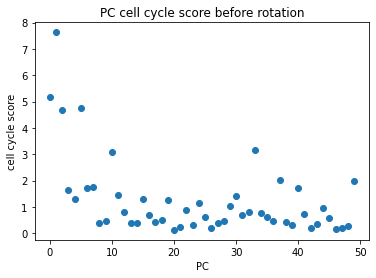

In [184]:
# PC cell cycle score
print(tpm_filtered_log_pca_phase_var)
plt.scatter(np.arange(50), tpm_filtered_log_pca_phase_var)
plt.title("PC cell cycle score before rotation")
plt.xlabel("PC")
plt.ylabel("cell cycle score")
plt.savefig("scLVM_variable_genes_PC_cc_score_by_ccMarker_before_rotation.png")

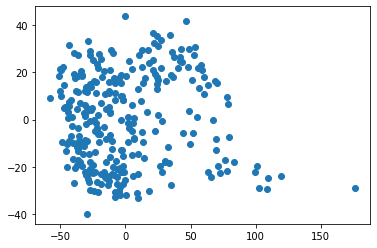

In [147]:
plt.scatter(tpm_filtered_log_pca.loc[0,:], tpm_filtered_log_pca.loc[1,:])

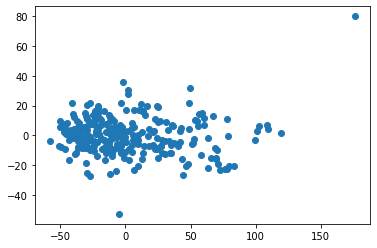

In [181]:
plt.scatter(tpm_filtered_log_pca.loc[0,:], tpm_filtered_log_pca.loc[7,:])

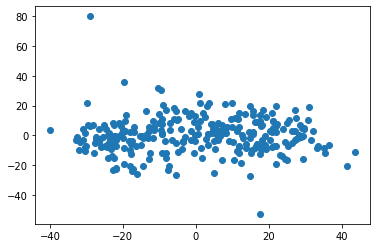

In [182]:
plt.scatter(tpm_filtered_log_pca.loc[1,:], tpm_filtered_log_pca.loc[7,:])

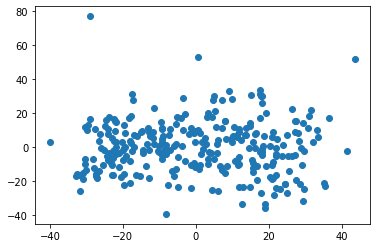

In [150]:
plt.scatter(tpm_filtered_log_pca.loc[1,:], tpm_filtered_log_pca.loc[3,:])

In [72]:
# 超級平面状に一様に点を分布させる
# http://extremelearning.com.au/how-to-evenly-distribute-points-on-a-sphere-more-effectively-than-the-canonical-fibonacci-lattice/
# cell cycle scoreが小さくなるようなviewing axisを見つける
# そのaxisは、phiとthetaで表す。
# ここで求めた、phi, thetaに従い、元PC達を全て、z軸周りに-phi, y軸周りに-theta回転させれば、
n = 10000
goldenRatio = (1 + 5**0.5) / 2
i = np.arange(0, n)
phi = 2 * np.pi * i / goldenRatio
theta = np.arccos(1 - 2*(i+0.5)/n)
x, y, z = np.cos(phi) * np.sin(theta), np.sin(phi) * np.sin(theta), np.cos(theta)

In [73]:
z[0]

0.9999

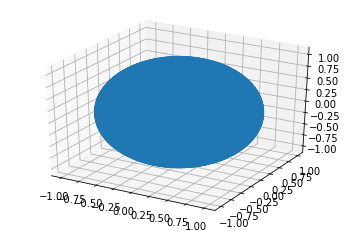

In [74]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x,y,z)
plt.show()

In [57]:
# x: PC0, y:PC1, z:PC7
tpm_filtered_log_pca_phase_mean[[0,1,2]]

,0,1,2
phase,,,
G1/S,1.026487,3.155669,-0.375564
G2,-3.285301,-0.609835,-2.167878
G2/M,0.786216,-2.399088,1.130612
M,0.551208,0.997214,-0.370902
S,2.965778,4.411833,3.578183


In [148]:
# ランダムに選んだviewing axisが上の6点の分散が小さくなるようにする。
# まず選んだviewing axis上に上の6点を射影する。3次元上の点を直線に射影し（あるベクトルから別のベクトルへの射影）、その座標を算出する。
min_cc_score = 10^4
viewing_axis_idx = 0
for idx, (i,j,k) in enumerate(zip(x,y,z)):
    # viewing axisの候補ベクトル
    candidate = np.array([i,j,k])
    ls = []
    for point in tpm_filtered_log_pca_phase_mean[[0,1,41]].iterrows():
        pnt =  np.array(point[1:][0])
        ls.append(np.dot(candidate,pnt))
    cc_score = np.var(ls)
    if cc_score < min_cc_score:
        min_cc_score = cc_score
        viewing_axis_idx = idx

In [149]:
print(viewing_axis_idx)
min_cc_score

9980


1.7554332606313707

In [150]:
optimal_phi = phi[viewing_axis_idx] % (2*np.pi)
optimal_theta = theta[viewing_axis_idx] % (np.pi)

In [151]:
print(np.sin(optimal_phi))
print(np.sin(phi[viewing_axis_idx]))
print(np.cos(optimal_theta))
print(np.cos(theta[viewing_axis_idx]))

-0.1302704243314872
-0.13027042433298483
-0.9961
-0.9961


In [152]:
# 50PCたちを、z軸周りに-optimal_phiだけ回転して、y軸周りに-optimal_thetaだけ回転する
# z軸周りに-optimal_phiだけ回転する用の行列
mtrx_phi = np.eye(50)
mtrx_phi[0,0] = np.cos(optimal_phi)
mtrx_phi[0,1] = np.sin(optimal_phi)
mtrx_phi[1,0] = -np.sin(optimal_phi)
mtrx_phi[1,1] = np.cos(optimal_phi)

# y軸周りに-optimal_theta
mtrx_theta = np.eye(50)
mtrx_theta[0,0] = np.cos(optimal_theta)
mtrx_theta[0,41] = -np.sin(optimal_theta)
mtrx_theta[41,0] = np.sin(optimal_theta)
mtrx_theta[41,41] = np.cos(optimal_theta)

In [153]:
tpm_filtered_log_pca_rotated = pd.DataFrame(mtrx_theta.dot(mtrx_phi.dot(tpm_filtered_log_pca)))
tpm_filtered_log_pca_rotated.columns = tpm_filtered_log_pca.columns
tpm_filtered_log_pca_rotated

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
0,0.014366,-7.088433,-2.982930,-8.696648,-9.184879,-13.343040,-4.254632,8.333036,5.853660,1.951759,...,5.342164,8.342580,22.582189,-3.590736,19.943341,11.922665,13.005633,-2.604253,-0.763566,1.251926
1,1.608899,12.191274,9.892631,11.335243,8.777895,9.067748,9.467485,9.233542,0.926591,4.298794,...,-4.375938,6.853541,1.220701,4.586156,5.933942,-7.363509,-1.956076,5.162551,8.521220,4.269733
2,-13.590597,-12.920023,-2.696616,-16.904332,-20.310954,25.473689,-8.749064,-6.455121,0.470103,2.283979,...,-14.503059,-31.099777,15.611029,-28.785270,-2.125592,6.787472,2.731541,-32.756319,-30.698344,-29.858606
3,6.626795,-0.043597,-7.315808,-1.670017,-1.430362,-3.487721,1.424214,-2.077131,5.514203,-9.357758,...,4.024551,6.422020,-0.809350,3.659360,2.133626,-3.990728,-0.441749,5.496995,0.705831,6.015607
4,3.511990,4.853771,4.101413,0.422604,3.378883,-9.264614,-3.501183,11.000371,9.289729,11.828617,...,-1.344873,-0.251827,8.602017,13.652214,4.481982,-4.533987,6.008611,0.630722,2.365201,-1.044287
5,10.359236,3.817431,0.981919,5.127160,6.275637,9.868942,7.738868,-0.390541,0.299001,2.724058,...,2.934311,6.774015,7.233683,11.274128,6.109643,-4.532000,-4.384320,1.872750,7.639482,8.935562
6,1.385101,-2.418796,0.847535,1.586603,-1.496861,-9.718336,0.269070,0.368583,-3.250196,-5.691796,...,0.013133,0.870387,-4.116269,-0.264018,-4.732398,-4.308994,2.540874,-1.365244,6.185555,4.976235
7,0.951310,4.587444,4.085753,0.615493,-1.302153,-13.780907,5.882524,-2.054827,0.940875,-1.227353,...,-8.352467,1.678602,-3.024563,-0.559772,0.543507,-4.523243,1.396516,-4.389385,3.907241,-5.107403
8,-3.676942,-0.709508,0.354902,-4.049256,1.701262,-13.709748,1.261435,0.095984,-0.999082,-0.340142,...,2.664381,5.898713,-3.259410,-3.470319,-3.785793,-3.471137,-8.797457,6.413244,-5.065340,0.710514
9,-3.012506,-3.110551,-4.030351,1.318967,0.367237,19.444360,-2.256216,2.230079,-2.004290,2.516046,...,2.657948,0.719645,-5.443971,3.454460,3.603849,-1.617312,-4.019132,-1.297500,3.267460,2.351023


In [154]:
tpm_filtered_log_pca_rotated_phase = pd.concat([tpm_filtered_log_pca_rotated, max_phase_df])
tpm_filtered_log_pca_rotated_phase

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
0,0.0143663,-7.08843,-2.98293,-8.69665,-9.18488,-13.343,-4.25463,8.33304,5.85366,1.95176,...,5.34216,8.34258,22.5822,-3.59074,19.9433,11.9227,13.0056,-2.60425,-0.763566,1.25193
1,1.6089,12.1913,9.89263,11.3352,8.77789,9.06775,9.46749,9.23354,0.926591,4.29879,...,-4.37594,6.85354,1.2207,4.58616,5.93394,-7.36351,-1.95608,5.16255,8.52122,4.26973
2,-13.5906,-12.92,-2.69662,-16.9043,-20.311,25.4737,-8.74906,-6.45512,0.470103,2.28398,...,-14.5031,-31.0998,15.611,-28.7853,-2.12559,6.78747,2.73154,-32.7563,-30.6983,-29.8586
3,6.62679,-0.0435971,-7.31581,-1.67002,-1.43036,-3.48772,1.42421,-2.07713,5.5142,-9.35776,...,4.02455,6.42202,-0.80935,3.65936,2.13363,-3.99073,-0.441749,5.49699,0.705831,6.01561
4,3.51199,4.85377,4.10141,0.422604,3.37888,-9.26461,-3.50118,11.0004,9.28973,11.8286,...,-1.34487,-0.251827,8.60202,13.6522,4.48198,-4.53399,6.00861,0.630722,2.3652,-1.04429
5,10.3592,3.81743,0.981919,5.12716,6.27564,9.86894,7.73887,-0.390541,0.299001,2.72406,...,2.93431,6.77401,7.23368,11.2741,6.10964,-4.532,-4.38432,1.87275,7.63948,8.93556
6,1.3851,-2.4188,0.847535,1.5866,-1.49686,-9.71834,0.26907,0.368583,-3.2502,-5.6918,...,0.0131331,0.870387,-4.11627,-0.264018,-4.7324,-4.30899,2.54087,-1.36524,6.18556,4.97623
7,0.95131,4.58744,4.08575,0.615493,-1.30215,-13.7809,5.88252,-2.05483,0.940875,-1.22735,...,-8.35247,1.6786,-3.02456,-0.559772,0.543507,-4.52324,1.39652,-4.38938,3.90724,-5.1074
8,-3.67694,-0.709508,0.354902,-4.04926,1.70126,-13.7097,1.26144,0.0959836,-0.999082,-0.340142,...,2.66438,5.89871,-3.25941,-3.47032,-3.78579,-3.47114,-8.79746,6.41324,-5.06534,0.710514
9,-3.01251,-3.11055,-4.03035,1.31897,0.367237,19.4444,-2.25622,2.23008,-2.00429,2.51605,...,2.65795,0.719645,-5.44397,3.45446,3.60385,-1.61731,-4.01913,-1.2975,3.26746,2.35102


In [155]:
tpm_filtered_log_pca_rotated_phase_mean = tpm_filtered_log_pca_rotated_phase.T.set_index("phase").astype(float).groupby("phase").mean()
tpm_filtered_log_pca_rotated_phase_var = tpm_filtered_log_pca_rotated_phase_mean.var()
tpm_filtered_log_pca_rotated_phase_mean

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
phase,,,,,,,,,,,,,,,,,,,,,
G1/S,2.035767,3.735123,-0.597750,-0.094313,0.207882,0.223043,-0.681332,1.869191,-0.079067,0.394137,...,-0.561087,0.263007,0.117252,0.046695,-0.224553,0.017009,-0.339474,0.652144,-0.151267,0.887713
G2,2.224046,-1.533196,0.822990,-1.657902,0.679151,-0.502355,-0.162771,-0.037074,0.803540,-0.303696,...,0.088312,-2.049552,0.835099,0.499825,0.162357,0.334090,-0.566002,0.242422,1.589540,0.286616
G2/M,-2.139793,-2.357203,-0.103025,0.715547,-1.490748,0.047650,0.518129,-0.740708,-0.406064,-0.412303,...,0.735292,0.186570,-0.735039,0.093006,0.532374,-0.080479,0.488645,-0.473473,0.099865,-0.033828
M,1.006908,0.172805,-0.524213,1.226829,1.646991,0.442808,-0.705297,-0.832300,-0.073297,0.019887,...,-0.100733,2.050745,-0.063216,-0.924728,-0.528183,-0.600927,0.466056,0.280567,-1.804639,-0.691745
S,-4.483035,8.472936,0.847364,-1.551469,0.627433,-0.402871,1.636533,1.762640,-0.141765,2.377082,...,-2.760151,-0.517549,1.091280,0.297344,-1.483637,1.025411,-1.243918,-0.812806,-0.530912,-1.253737


0      8.603276
1     19.815286
2      0.499597
3      1.702769
4      1.318697
5      0.163853
6      0.965395
7      1.756507
8      0.210037
9      1.301818
10     0.647061
11     1.803517
12     0.688162
13     0.903769
14     0.480508
15     0.455186
16     1.594240
17     0.647447
18     0.768971
19     0.413832
20     0.235678
21     0.514222
22     0.687866
23     0.141335
24     0.364202
25     0.381115
26     0.188394
27     0.431840
28     0.813816
29     0.970891
30     1.836037
31     0.202450
32     0.289749
33     0.114411
34     0.758676
35     0.690275
36     0.310028
37     0.171460
38     0.596824
39     0.587795
40     1.785388
41     2.194292
42     0.534029
43     0.301040
44     0.591258
45     0.358582
46     0.538364
47     0.361284
48     1.492727
49     0.698024
dtype: float64


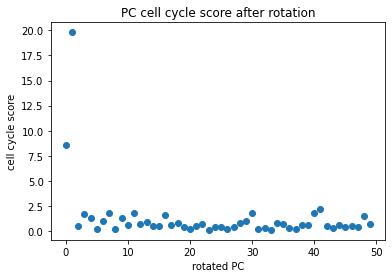

In [156]:
# PC cell cycle score
print(tpm_filtered_log_pca_rotated_phase_var)
plt.scatter(np.arange(50), tpm_filtered_log_pca_rotated_phase_var)
plt.title("PC cell cycle score after rotation")
plt.xlabel("rotated PC")
plt.ylabel("cell cycle score")
plt.savefig("scLVM_variable_genes_PC_cc_score_by_ccMarker_after_rotation.png")

In [144]:
tpm_filtered_log_pca = tpm_filtered_log_pca_rotated

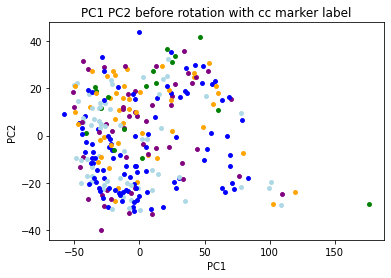

In [258]:
phases = ["G1", "G1/S", "S", "G2", "G2/M", "M"]
colors = ["red", "orange", "green", "lightblue", "blue", "purple"]
#fig = plt.figure(figsize=(12,8))
for i in tpm_filtered_log_pca_phase.loc[[0,1,"phase"],:].iteritems():
    plt.scatter(i[1][0], i[1][1], c=colors[phases.index(i[1]["phase"])], s=15)
    #labels = tpm_filtered_log_pca_rotated_phase.loc["phase",:]
#plt.scatter(tpm_filtered_log_pca_rotated_phase.loc[0,:], tpm_filtered_log_pca_rotated_phase.loc[1,:], c=labels)
plt.title("PC1 PC2 before rotation with cc marker label")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("scLVM_all_genes_PC1_PC2_before_rotation_ccMarker.png")
#plt.scatter(tpm_filtered_log_pca.loc[0,:], tpm_filtered_log_pca.loc[1,:])

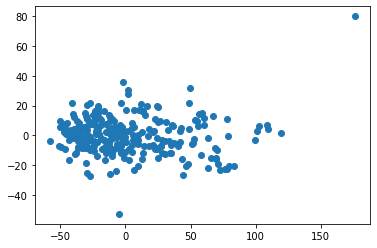

In [183]:
plt.scatter(tpm_filtered_log_pca.loc[0,:], tpm_filtered_log_pca.loc[7,:])

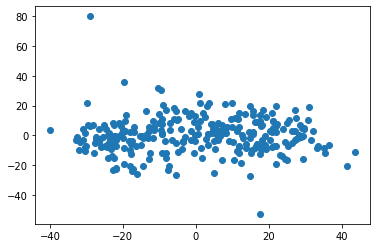

In [184]:
plt.scatter(tpm_filtered_log_pca.loc[1,:], tpm_filtered_log_pca.loc[7,:])

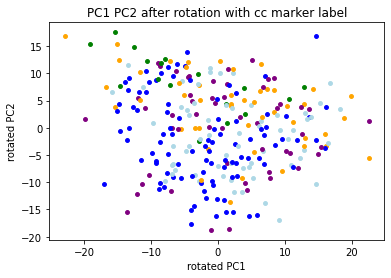

In [157]:
phases = ["G1", "G1/S", "S", "G2", "G2/M", "M"]
colors = ["red", "orange", "green", "lightblue", "blue", "purple"]
dc1_dc2_phase = tpm_filtered_log_pca_rotated_phase.loc[[0,1,"phase"],:]
#fig = plt.figure(figsize=(12,8))
for i in dc1_dc2_phase.iteritems():
    plt.scatter(i[1][0], i[1][1], c=colors[phases.index(i[1]["phase"])], s=15)
    #labels = tpm_filtered_log_pca_rotated_phase.loc["phase",:]
#plt.scatter(tpm_filtered_log_pca_rotated_phase.loc[0,:], tpm_filtered_log_pca_rotated_phase.loc[1,:], c=labels)
plt.title("PC1 PC2 after rotation with cc marker label")
plt.xlabel("rotated PC1")
plt.ylabel("rotated PC2")
plt.savefig("scLVM_all_genes_PC1_PC2_after_rotation_ccMarker.png")

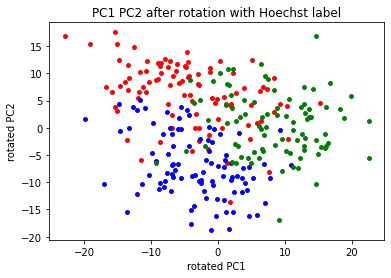

In [158]:
phases = ["G1", "S","G2M"]
colors = ["red", "green", "blue"]
dc1_dc2_phase = tpm_filtered_log_pca_rotated_phase.loc[[0,1],:]
#fig = plt.figure(figsize=(12,8))
for i in dc1_dc2_phase.iteritems():
    #print(i[0])
    for phase in phases:
        if phase in i[0]:
            color = colors[phases.index(phase)]
    plt.scatter(i[1][0], i[1][1], c=color, s=15)
    #labels = tpm_filtered_log_pca_rotated_phase.loc["phase",:]
#plt.scatter(tpm_filtered_log_pca_rotated_phase.loc[0,:], tpm_filtered_log_pca_rotated_phase.loc[1,:], c=labels)
plt.title("PC1 PC2 after rotation with Hoechst label")
plt.xlabel("rotated PC1")
plt.ylabel("rotated PC2")
plt.savefig("scLVM_all_genes_PC1_PC2_after_rotation_Hoechst.png")

In [ ]:
# ここまではcc_markersでccを割り当てて、それに基づいてPCA cc scoreを出して、回転していたが、
# 既にあるlabelで、PCA cc scoreを出して回転して描画してみる！！

In [185]:
phases = ["G1", "S","G2M"]
hoechst_phase = []
for i in tpm_filtered_log_pca.iteritems():
    for phase in phases:
        if phase in i[0]:
            hoechst_phase.append(phase)
            
hoechst_phase_df = pd.DataFrame(hoechst_phase).T
hoechst_phase_df.index = ["phase"]
hoechst_phase_df.columns = tpm_filtered_log_pca.columns
tpm_filtered_log_pca_hoechst_phase = pd.concat([tpm_filtered_log_pca, hoechst_phase_df, ])
tpm_filtered_log_pca_hoechst_phase

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
0,17.1097,19.5204,8.65644,23.2571,28.0313,-1.91656,13.6076,6.35733,-1.95534,0.52281,...,7.0498,24.6411,-25.8668,24.4882,-6.56735,-18.8351,-9.96439,29.9463,24.7981,27.0894
1,6.84207,6.28787,4.80984,4.61628,2.42562,13.4803,10.6,8.25478,5.5034,7.31237,...,-0.370991,1.67652,16.5617,6.33002,11.6533,-1.53976,-1.84698,-0.565017,4.45217,2.56317
2,-3.22759,0.728962,4.43708,-1.21441,-0.524835,32.3246,-0.508723,-4.27427,-2.40052,2.47263,...,-13.2805,-20.1597,-7.93145,-17.2476,-12.8472,-9.7831,-5.9656,-16.3425,-19.3922,-15.7652
3,6.80286,0.0245844,-6.81697,-1.68181,-1.31801,-3.9727,1.4273,-1.96323,5.52559,-9.14934,...,4.61147,6.48359,-1.12226,4.03444,1.55981,-3.75239,-0.554879,5.62994,0.689096,6.28313
4,3.88642,5.17871,3.36004,0.996308,3.2523,-8.56312,-4.0463,11.7495,10.6413,13.8668,...,0.533248,-1.15408,8.10358,13.5023,3.92372,-2.78687,5.98789,0.496316,1.44561,-1.49233
5,5.05792,-3.04761,-1.6049,-0.990623,-0.272624,-0.882761,-1.4976,-6.70358,-1.27516,-1.58565,...,2.80906,5.57002,2.95629,7.53349,-0.498468,-2.20791,-1.25916,-1.1342,3.6228,5.51137
6,0.535935,-0.846359,3.60249,1.36786,-2.37485,-8.35307,-4.29843,-0.818569,-6.4392,-4.51044,...,-0.276962,2.50356,-2.8542,-2.03773,-4.93294,-4.97374,4.27909,0.256496,3.39474,6.09266
7,0.53158,3.85534,4.13251,1.6431,-4.39514,-13.4216,5.70516,-1.66701,2.95222,0.46675,...,-10.0057,0.0164039,-3.90915,-0.568358,-0.421889,-2.88575,-1.19284,-2.8912,5.68563,-4.53277
8,2.64275,0.468569,0.568218,7.01558,-1.62884,13.373,-3.25664,0.248001,1.23895,-0.776943,...,-1.19673,-2.37849,2.77067,2.9605,8.45619,3.2452,5.53953,-7.77134,6.54886,-0.075319
9,-1.14166,-5.02795,-6.87806,0.410544,0.313616,17.8687,-2.62844,-0.981193,-0.373515,4.04562,...,8.84814,-4.20066,-2.78662,3.47371,0.966543,-1.60527,-6.99874,-0.538207,-0.0393642,0.499263


In [186]:
tpm_filtered_log_pca_hoechst_phase_mean = tpm_filtered_log_pca_hoechst_phase.T.set_index("phase").astype(float).groupby("phase").mean()
tpm_filtered_log_pca_hoechst_phase_var = tpm_filtered_log_pca_hoechst_phase_mean.var()
tpm_filtered_log_pca_hoechst_phase_mean

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
phase,,,,,,,,,,,,,,,,,,,,,
G1,6.948296,4.272762,4.998913,-1.248354,1.219920,-1.877973,-0.438121,1.503650,-0.633217,-0.296501,...,-0.076871,-0.457954,0.008180,-0.766511,-0.230661,-0.411089,-0.157351,0.207110,0.116271,-0.402787
G2M,1.214633,-7.981197,-0.101826,-1.701027,1.056555,2.581726,-0.838796,-0.239538,0.290023,0.630218,...,-0.075317,0.027508,-0.003314,0.500266,0.193049,-0.141036,0.283223,0.085437,-0.449433,0.047616
S,-8.905014,4.045566,-5.342277,3.217506,-2.483427,-0.767731,1.393000,-1.379030,0.374394,-0.364055,...,0.166024,0.469577,-0.005309,0.290449,0.041031,0.602318,-0.137314,-0.319143,0.363449,0.387459


0     64.434935
1     49.142358
2     26.736683
3      7.390128
4      4.378825
5      5.390071
6      1.415743
7      2.107832
8      0.312462
9      0.308658
10     0.018647
11     0.886491
12     0.005963
13     0.416151
14     0.692641
15     0.542534
16     0.731953
17     0.321879
18     0.077060
19     0.066741
20     0.954426
21     0.002101
22     0.005821
23     0.894313
24     0.860732
25     0.088333
26     0.007866
27     0.013602
28     0.066429
29     0.175459
30     0.079560
31     0.044500
32     0.039469
33     0.016810
34     0.073935
35     0.386922
36     0.277912
37     0.168068
38     0.190883
39     0.349405
40     0.019541
41     0.215235
42     0.000053
43     0.460985
44     0.046076
45     0.275417
46     0.061893
47     0.075905
48     0.173649
49     0.157141
dtype: float64


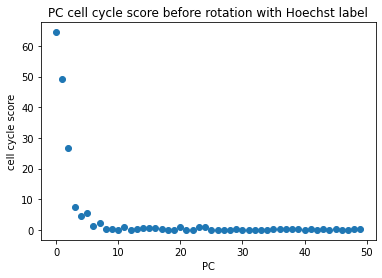

In [187]:
print(tpm_filtered_log_pca_hoechst_phase_var)
plt.scatter(np.arange(50), tpm_filtered_log_pca_hoechst_phase_var)
plt.title("PC cell cycle score before rotation with Hoechst label")
plt.xlabel("PC")
plt.ylabel("cell cycle score")
plt.savefig("scLVM_variable_genes_PC_cc_score_by_Hoechst_before_rotation.png")

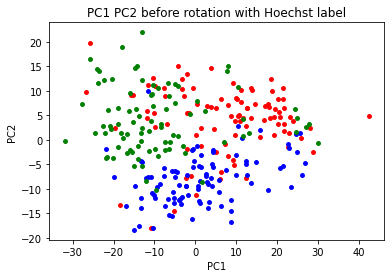

In [189]:
phases = ["G1", "S", "G2M"]
colors = ["red", "green", "blue"]
#fig = plt.figure(figsize=(12,8))
for i in tpm_filtered_log_pca_hoechst_phase.loc[[0,1,"phase"],:].iteritems():
    plt.scatter(i[1][0], i[1][1], c=colors[phases.index(i[1]["phase"])], s=15)

#plt.scatter(tpm_filtered_log_pca_hoechst_phase.loc[0,:], tpm_filtered_log_pca_hoechst_phase.loc[1,:])
plt.title("PC1 PC2 before rotation with Hoechst label")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("scLVM_variable_genes_PC1_PC2_before_rotation_Hoechst.png")

In [190]:
tpm_filtered_log_pca_hoechst_phase.loc[[0,1,"phase"],:]

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
0,17.1097,19.5204,8.65644,23.2571,28.0313,-1.91656,13.6076,6.35733,-1.95534,0.52281,...,7.0498,24.6411,-25.8668,24.4882,-6.56735,-18.8351,-9.96439,29.9463,24.7981,27.0894
1,6.84207,6.28787,4.80984,4.61628,2.42562,13.4803,10.6,8.25478,5.5034,7.31237,...,-0.370991,1.67652,16.5617,6.33002,11.6533,-1.53976,-1.84698,-0.565017,4.45217,2.56317
phase,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,...,S,S,S,S,S,S,S,S,S,S


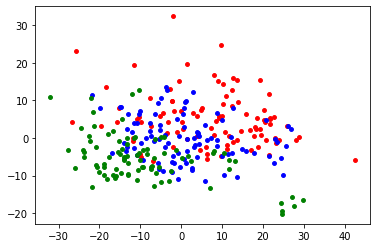

In [191]:
phases = ["G1", "S", "G2M"]
colors = ["red", "green", "blue"]
#fig = plt.figure(figsize=(12,8))
for i in tpm_filtered_log_pca_hoechst_phase.loc[[0,2,"phase"],:].iteritems():
    plt.scatter(i[1][0], i[1][2], c=colors[phases.index(i[1]["phase"])], s=15)

#plt.scatter(tpm_filtered_log_pca_hoechst_phase.loc[0,:], tpm_filtered_log_pca_hoechst_phase.loc[1,:])
#plt.scatter(tpm_filtered_log_pca.loc[0,:], tpm_filtered_log_pca.loc[2,:])

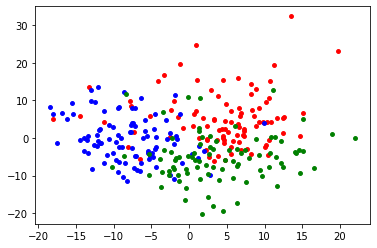

In [192]:
phases = ["G1", "S", "G2M"]
colors = ["red", "green", "blue"]
#fig = plt.figure(figsize=(12,8))
for i in tpm_filtered_log_pca_hoechst_phase.loc[[1,2,"phase"],:].iteritems():
    plt.scatter(i[1][1], i[1][2], c=colors[phases.index(i[1]["phase"])], s=15)

#plt.scatter(tpm_filtered_log_pca_hoechst_phase.loc[0,:], tpm_filtered_log_pca_hoechst_phase.loc[1,:])

In [193]:
# ランダムに選んだviewing axisが上の6点の分散が小さくなるようにする。
# まず選んだviewing axis上に上の6点を射影する。3次元上の点を直線に射影し（あるベクトルから別のベクトルへの射影）、その座標を算出する。
min_cc_score = 10^4
viewing_axis_idx = 0
for idx, (i,j,k) in enumerate(zip(x,y,z)):
    # viewing axisの候補ベクトル
    candidate = np.array([i,j,k])
    ls = []
    for point in tpm_filtered_log_pca_hoechst_phase_mean[[0,1,2]].iterrows():
        pnt =  np.array(point[1:][0])
        ls.append(np.dot(candidate,pnt))
    cc_score = np.var(ls)
    if cc_score < min_cc_score:
        min_cc_score = cc_score
        viewing_axis_idx = idx

In [194]:
print(viewing_axis_idx)
min_cc_score

9184


0.003952658306988668

In [195]:
optimal_phi = phi[viewing_axis_idx] % (2*np.pi)
optimal_theta = theta[viewing_axis_idx] % (np.pi)

In [196]:
print(np.sin(optimal_phi))
print(np.sin(phi[viewing_axis_idx]))
print(np.cos(optimal_theta))
print(np.cos(theta[viewing_axis_idx]))

0.15117394400980833
0.1511739440084341
-0.8369
-0.8369


In [197]:
# 50PCたちを、z軸周りに-optimal_phiだけ回転して、y軸周りに-optimal_thetaだけ回転する
# z軸周りに-optimal_phiだけ回転する用の行列
mtrx_phi = np.eye(50)
mtrx_phi[0,0] = np.cos(optimal_phi)
mtrx_phi[0,1] = np.sin(optimal_phi)
mtrx_phi[1,0] = -np.sin(optimal_phi)
mtrx_phi[1,1] = np.cos(optimal_phi)

# y軸周りに-optimal_theta
mtrx_theta = np.eye(50)
mtrx_theta[0,0] = np.cos(optimal_theta)
mtrx_theta[0,2] = -np.sin(optimal_theta)
mtrx_theta[2,0] = np.sin(optimal_theta)
mtrx_theta[2,2] = np.cos(optimal_theta)

In [198]:
tpm_filtered_log_pca_hoechst_rotated = pd.DataFrame(mtrx_theta.dot(mtrx_phi.dot(tpm_filtered_log_pca)))
tpm_filtered_log_pca_hoechst_rotated.columns = tpm_filtered_log_pca.columns
tpm_filtered_log_pca_hoechst_rotated

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
0,-13.253547,-17.343361,-10.198501,-19.159507,-23.209407,-17.813045,-12.319964,-3.964133,2.235275,-2.711065,...,1.483913,-9.562714,23.645108,-11.618933,10.990681,21.131597,11.742338,-15.757359,-10.463900,-14.105687
1,4.176893,3.264632,3.445930,1.047361,-1.839858,13.615089,8.421093,7.198850,5.735743,7.149294,...,-1.432473,-2.067840,20.281766,2.555289,12.512170,1.325319,-0.319396,-5.085616,0.652169,-1.561505
2,12.524793,10.472013,1.368298,13.981928,15.806714,-26.974041,8.665464,7.699916,1.406413,-1.181404,...,14.898128,30.342851,-5.987383,28.208070,8.162708,-2.130958,-0.551609,29.833123,30.015089,28.063116
3,6.802856,0.024584,-6.816975,-1.681805,-1.318009,-3.972697,1.427302,-1.963232,5.525586,-9.149344,...,4.611468,6.483589,-1.122257,4.034438,1.559808,-3.752389,-0.554879,5.629936,0.689096,6.283130
4,3.886415,5.178714,3.360039,0.996308,3.252300,-8.563123,-4.046301,11.749522,10.641326,13.866828,...,0.533248,-1.154080,8.103584,13.502281,3.923718,-2.786872,5.987894,0.496316,1.445607,-1.492328
5,5.057918,-3.047609,-1.604905,-0.990623,-0.272624,-0.882761,-1.497596,-6.703576,-1.275158,-1.585649,...,2.809058,5.570015,2.956288,7.533494,-0.498468,-2.207909,-1.259164,-1.134201,3.622796,5.511370
6,0.535935,-0.846359,3.602492,1.367857,-2.374852,-8.353068,-4.298425,-0.818569,-6.439198,-4.510436,...,-0.276962,2.503561,-2.854201,-2.037727,-4.932941,-4.973737,4.279086,0.256496,3.394742,6.092659
7,0.531580,3.855336,4.132511,1.643096,-4.395140,-13.421647,5.705159,-1.667009,2.952223,0.466750,...,-10.005666,0.016404,-3.909150,-0.568358,-0.421889,-2.885752,-1.192837,-2.891200,5.685630,-4.532772
8,2.642753,0.468569,0.568218,7.015581,-1.628838,13.372977,-3.256643,0.248001,1.238954,-0.776943,...,-1.196734,-2.378494,2.770665,2.960503,8.456192,3.245198,5.539529,-7.771336,6.548865,-0.075319
9,-1.141662,-5.027949,-6.878063,0.410544,0.313616,17.868660,-2.628440,-0.981193,-0.373515,4.045615,...,8.848138,-4.200658,-2.786624,3.473706,0.966543,-1.605274,-6.998740,-0.538207,-0.039364,0.499263


In [199]:
tpm_filtered_log_pca_hoechst_rotated_phase = pd.concat([hoechst_phase_df, tpm_filtered_log_pca_hoechst_rotated])
tpm_filtered_log_pca_hoechst_rotated_phase

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
phase,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,...,S,S,S,S,S,S,S,S,S,S
0,-13.2535,-17.3434,-10.1985,-19.1595,-23.2094,-17.813,-12.32,-3.96413,2.23527,-2.71106,...,1.48391,-9.56271,23.6451,-11.6189,10.9907,21.1316,11.7423,-15.7574,-10.4639,-14.1057
1,4.17689,3.26463,3.44593,1.04736,-1.83986,13.6151,8.42109,7.19885,5.73574,7.14929,...,-1.43247,-2.06784,20.2818,2.55529,12.5122,1.32532,-0.319396,-5.08562,0.652169,-1.5615
2,12.5248,10.472,1.3683,13.9819,15.8067,-26.974,8.66546,7.69992,1.40641,-1.1814,...,14.8981,30.3429,-5.98738,28.2081,8.16271,-2.13096,-0.551609,29.8331,30.0151,28.0631
3,6.80286,0.0245844,-6.81697,-1.68181,-1.31801,-3.9727,1.4273,-1.96323,5.52559,-9.14934,...,4.61147,6.48359,-1.12226,4.03444,1.55981,-3.75239,-0.554879,5.62994,0.689096,6.28313
4,3.88642,5.17871,3.36004,0.996308,3.2523,-8.56312,-4.0463,11.7495,10.6413,13.8668,...,0.533248,-1.15408,8.10358,13.5023,3.92372,-2.78687,5.98789,0.496316,1.44561,-1.49233
5,5.05792,-3.04761,-1.6049,-0.990623,-0.272624,-0.882761,-1.4976,-6.70358,-1.27516,-1.58565,...,2.80906,5.57002,2.95629,7.53349,-0.498468,-2.20791,-1.25916,-1.1342,3.6228,5.51137
6,0.535935,-0.846359,3.60249,1.36786,-2.37485,-8.35307,-4.29843,-0.818569,-6.4392,-4.51044,...,-0.276962,2.50356,-2.8542,-2.03773,-4.93294,-4.97374,4.27909,0.256496,3.39474,6.09266
7,0.53158,3.85534,4.13251,1.6431,-4.39514,-13.4216,5.70516,-1.66701,2.95222,0.46675,...,-10.0057,0.0164039,-3.90915,-0.568358,-0.421889,-2.88575,-1.19284,-2.8912,5.68563,-4.53277
8,2.64275,0.468569,0.568218,7.01558,-1.62884,13.373,-3.25664,0.248001,1.23895,-0.776943,...,-1.19673,-2.37849,2.77067,2.9605,8.45619,3.2452,5.53953,-7.77134,6.54886,-0.075319


In [200]:
tpm_filtered_log_pca_hoechst_rotated_phase_mean = tpm_filtered_log_pca_hoechst_rotated_phase.T.set_index("phase").astype(float).groupby("phase").mean()
tpm_filtered_log_pca_hoechst_rotated_phase_var = tpm_filtered_log_pca_hoechst_rotated_phase_mean.var()
tpm_filtered_log_pca_hoechst_rotated_phase_mean

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
phase,,,,,,,,,,,,,,,,,,,,,
G1,-9.024962,3.173254,-0.070556,-1.248354,1.219920,-1.877973,-0.438121,1.503650,-0.633217,-0.296501,...,-0.076871,-0.457954,0.008180,-0.766511,-0.230661,-0.411089,-0.157351,0.207110,0.116271,-0.402787
G2M,0.060652,-8.073091,0.082002,-1.701027,1.056555,2.581726,-0.838796,-0.239538,0.290023,0.630218,...,-0.075317,0.027508,-0.003314,0.500266,0.193049,-0.141036,0.283223,0.085437,-0.449433,0.047616
S,9.779247,5.345277,-0.012487,3.217506,-2.483427,-0.767731,1.393000,-1.379030,0.374394,-0.364055,...,0.166024,0.469577,-0.005309,0.290449,0.041031,0.602318,-0.137314,-0.319143,0.363449,0.387459


0     88.432950
1     51.875097
2      0.005929
3      7.390128
4      4.378825
5      5.390071
6      1.415743
7      2.107832
8      0.312462
9      0.308658
10     0.018647
11     0.886491
12     0.005963
13     0.416151
14     0.692641
15     0.542534
16     0.731953
17     0.321879
18     0.077060
19     0.066741
20     0.954426
21     0.002101
22     0.005821
23     0.894313
24     0.860732
25     0.088333
26     0.007866
27     0.013602
28     0.066429
29     0.175459
30     0.079560
31     0.044500
32     0.039469
33     0.016810
34     0.073935
35     0.386922
36     0.277912
37     0.168068
38     0.190883
39     0.349405
40     0.019541
41     0.215235
42     0.000053
43     0.460985
44     0.046076
45     0.275417
46     0.061893
47     0.075905
48     0.173649
49     0.157141
dtype: float64


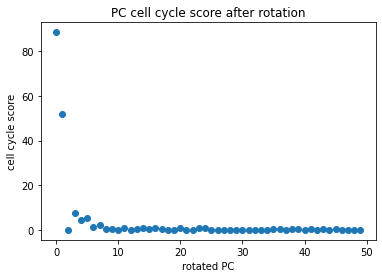

In [201]:
# PC cell cycle score
print(tpm_filtered_log_pca_hoechst_rotated_phase_var)
plt.scatter(np.arange(50), tpm_filtered_log_pca_hoechst_rotated_phase_var)
plt.title("PC cell cycle score after rotation")
plt.xlabel("rotated PC")
plt.ylabel("cell cycle score")
plt.savefig("scLVM_variable_genes_PC_cc_score_by_Hoechst_after_rotation.png")

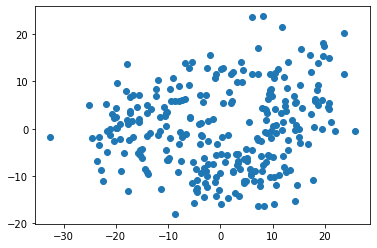

In [202]:
plt.scatter(tpm_filtered_log_pca_hoechst_rotated.loc[0,:], tpm_filtered_log_pca_hoechst_rotated.loc[1,:])

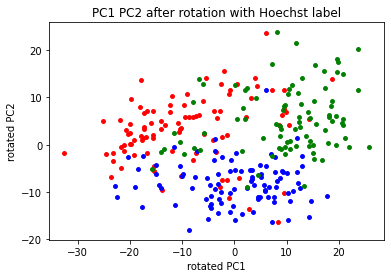

In [204]:
phases = ["G1", "S", "G2M"]
colors = ["red", "green", "blue"]
dc1_dc2_hoechst_phase = tpm_filtered_log_pca_hoechst_rotated_phase.loc[[0,1,"phase"],:]
#fig = plt.figure(figsize=(12,8))
for i in dc1_dc2_hoechst_phase.iteritems():
    plt.scatter(i[1][0], i[1][1], c=colors[phases.index(i[1]["phase"])], s=15)
    #labels = tpm_filtered_log_pca_rotated_phase.loc["phase",:]
#plt.scatter(tpm_filtered_log_pca_rotated_phase.loc[0,:], tpm_filtered_log_pca_rotated_phase.loc[1,:], c=labels)
plt.title("PC1 PC2 after rotation with Hoechst label")
plt.xlabel("rotated PC1")
plt.ylabel("rotated PC2")
plt.savefig("scLVM_variable_genes_PC1_PC2_after_rotation_Hoechst_score.png")

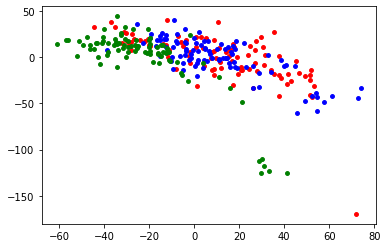

In [524]:
phases = ["G1", "S", "G2M"]
colors = ["red", "green", "blue"]
dc1_dc2_hoechst_phase = tpm_filtered_log_pca_hoechst_rotated_phase.loc[[0,2,"phase"],:]
#fig = plt.figure(figsize=(12,8))
for i in dc1_dc2_hoechst_phase.iteritems():
    plt.scatter(i[1][0], i[1][2], c=colors[phases.index(i[1]["phase"])], s=15)
    #labels = tpm_filtered_log_pca_rotated_phase.loc["phase",:]
#plt.scatter(tpm_filtered_log_pca_rotated_phase.loc[0,:], tpm_filtered_log_pca_rotated_phase.loc[1,:], c=labels)

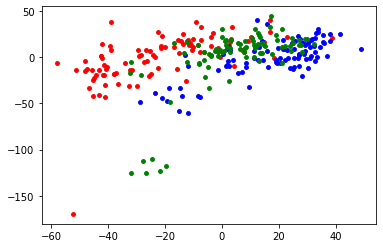

In [525]:
phases = ["G1", "S", "G2M"]
colors = ["red", "green", "blue"]
dc1_dc2_hoechst_phase = tpm_filtered_log_pca_hoechst_rotated_phase.loc[[1,2,"phase"],:]
#fig = plt.figure(figsize=(12,8))
for i in dc1_dc2_hoechst_phase.iteritems():
    plt.scatter(i[1][1], i[1][2], c=colors[phases.index(i[1]["phase"])], s=15)
    #labels = tpm_filtered_log_pca_rotated_phase.loc["phase",:]
#plt.scatter(tpm_filtered_log_pca_rotated_phase.loc[0,:], tpm_filtered_log_pca_rotated_phase.loc[1,:], c=labels)

In [206]:
tpm_filtered_log_pca_hoechst_rotated_marker_phase = pd.concat([tpm_filtered_log_pca_hoechst_rotated, max_phase_df])
tpm_filtered_log_pca_hoechst_rotated_marker_phase

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
0,-13.2535,-17.3434,-10.1985,-19.1595,-23.2094,-17.813,-12.32,-3.96413,2.23527,-2.71106,...,1.48391,-9.56271,23.6451,-11.6189,10.9907,21.1316,11.7423,-15.7574,-10.4639,-14.1057
1,4.17689,3.26463,3.44593,1.04736,-1.83986,13.6151,8.42109,7.19885,5.73574,7.14929,...,-1.43247,-2.06784,20.2818,2.55529,12.5122,1.32532,-0.319396,-5.08562,0.652169,-1.5615
2,12.5248,10.472,1.3683,13.9819,15.8067,-26.974,8.66546,7.69992,1.40641,-1.1814,...,14.8981,30.3429,-5.98738,28.2081,8.16271,-2.13096,-0.551609,29.8331,30.0151,28.0631
3,6.80286,0.0245844,-6.81697,-1.68181,-1.31801,-3.9727,1.4273,-1.96323,5.52559,-9.14934,...,4.61147,6.48359,-1.12226,4.03444,1.55981,-3.75239,-0.554879,5.62994,0.689096,6.28313
4,3.88642,5.17871,3.36004,0.996308,3.2523,-8.56312,-4.0463,11.7495,10.6413,13.8668,...,0.533248,-1.15408,8.10358,13.5023,3.92372,-2.78687,5.98789,0.496316,1.44561,-1.49233
5,5.05792,-3.04761,-1.6049,-0.990623,-0.272624,-0.882761,-1.4976,-6.70358,-1.27516,-1.58565,...,2.80906,5.57002,2.95629,7.53349,-0.498468,-2.20791,-1.25916,-1.1342,3.6228,5.51137
6,0.535935,-0.846359,3.60249,1.36786,-2.37485,-8.35307,-4.29843,-0.818569,-6.4392,-4.51044,...,-0.276962,2.50356,-2.8542,-2.03773,-4.93294,-4.97374,4.27909,0.256496,3.39474,6.09266
7,0.53158,3.85534,4.13251,1.6431,-4.39514,-13.4216,5.70516,-1.66701,2.95222,0.46675,...,-10.0057,0.0164039,-3.90915,-0.568358,-0.421889,-2.88575,-1.19284,-2.8912,5.68563,-4.53277
8,2.64275,0.468569,0.568218,7.01558,-1.62884,13.373,-3.25664,0.248001,1.23895,-0.776943,...,-1.19673,-2.37849,2.77067,2.9605,8.45619,3.2452,5.53953,-7.77134,6.54886,-0.075319
9,-1.14166,-5.02795,-6.87806,0.410544,0.313616,17.8687,-2.62844,-0.981193,-0.373515,4.04562,...,8.84814,-4.20066,-2.78662,3.47371,0.966543,-1.60527,-6.99874,-0.538207,-0.0393642,0.499263


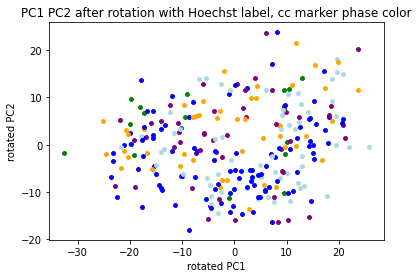

In [207]:
phases = ["G1", "G1/S", "S", "G2", "G2/M", "M"]
colors = ["red", "orange", "green", "lightblue", "blue", "purple"]
dc1_dc2_phase = tpm_filtered_log_pca_hoechst_rotated_marker_phase.loc[[0,1,"phase"],:]
#fig = plt.figure(figsize=(12,8))
for i in dc1_dc2_phase.iteritems():
    plt.scatter(i[1][0], i[1][1], c=colors[phases.index(i[1]["phase"])], s=15)
    #labels = tpm_filtered_log_pca_rotated_phase.loc["phase",:]
#plt.scatter(tpm_filtered_log_pca_rotated_phase.loc[0,:], tpm_filtered_log_pca_rotated_phase.loc[1,:], c=labels)
plt.title("PC1 PC2 after rotation with Hoechst label, cc marker phase color")
plt.xlabel("rotated PC1")
plt.ylabel("rotated PC2")
plt.savefig("scLVM_variable_genes_PC1_PC2_after_rotation_Hoechst_score_ccMarker_color.png")

In [286]:
# ラベリング度合いの違い
max_phase_df

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
phase,G2/M,G1/S,S,M,G2/M,G2/M,M,M,M,G1/S,...,G1/S,G1/S,M,G2,G1/S,M,G1/S,G1/S,M,G2


In [287]:
hoechst_phase_df

,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,G1_cell7_count,G1_cell8_count,G1_cell9_count,G1_cell10_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
phase,G1,G1,G1,G1,G1,G1,G1,G1,G1,G1,...,S,S,S,S,S,S,S,S,S,S


In [295]:
cnt = 0
for cell in hoechst_phase_df.iteritems():
    hoechst_phase = cell[1]["phase"]
    cc_phase = max_phase_df.loc["phase", cell[0]]
#     print(hoechst_phase)
#     print(cc_phase)
    if hoechst_phase in cc_phase:
        cnt += 1

print(cnt)

48


In [ ]:
six_phases = ["G1", "G1/S", "S", "G2", "G2/M", "M"]

In [502]:
tpm_pca_val_hoechst_phase_mean = tpm_pca_val_hoechst_phase.groupby("Phase").mean()
tpm_pca_val_hoechst_phase_mean

NameError: name 'tpm_pca_val_hoechst_phase' is not defined

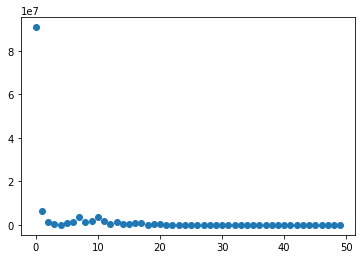

In [78]:
plt.scatter(np.arange(50), tpm_pca_val_phase_mean.var())

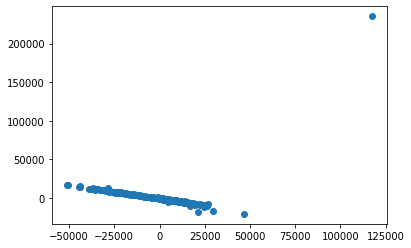

In [80]:
plt.scatter(tpm_val_phase[0], tpm_val_phase[1])

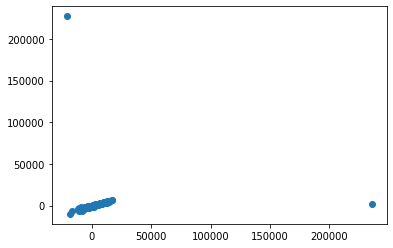

In [82]:
plt.scatter(tpm_val_phase[1], tpm_val_phase[2])

In [5]:
# scLVMのサプリTable1。GOとCyclebaseから取ってきて、マウスの細胞周期マーカーに対応させたもののリスト
# scLVMでは、周期の相はおそらく重要ではないので、周期に関する情報は載っていない。
df_cell_cycle_genes = pd.read_csv("data/cell_cycle_genes.csv", header=None)
df_cell_cycle_genes

,0
0,ENSMUSG00000019256
1,ENSMUSG00000021866
2,ENSMUSG00000017716
3,ENSMUSG00000007815
4,ENSMUSG00000034218
...,...
887,ENSMUSG00000067367
888,ENSMUSG00000012126
889,ENSMUSG00000078773
890,ENSMUSG00000032309


In [147]:
# scLVMのサプリデータ1。サプリノートに書いてある基準に従って、前処理されたmESCのデータ。181個のうちG1, S, G2/Mがそれぞれどれだけあるかはわかるが、どのcellに対応しているかはわからない。
# 181 cellはいくつかのフィルタリングを突破したもの。9571はある基準による発現変動遺伝子
# ERCC spike inがわからない。
df_mESC = pd.read_csv("data/mESC_expr_modified.csv").iloc[:, 1:]
df_mESC

,Gnai3,Cdc45,H19,Scml2,Narf,Klf6,Scmh1,Cox5a,Tbx4,Ngfr,...,AC148981.1,AC127583.1,AL844859.1,AC137970.1,AC124446.1,AC154625.1,AL714024.1,AC102860.1,AC147987.1,AC132389.挀
0,1.736329,2.592285,0.0,0.000000,1.126923,2.526728,0.912525,2.438271,1.865751,0.218098,...,0.0,0.629581,0.000000,0.0,0.218098,0.000000,0.0,0.0,0.000000,0.000000
1,0.735282,0.994408,0.0,0.000000,0.000000,0.275820,0.000000,2.546955,0.000000,0.000000,...,0.0,2.665802,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.275820
2,2.139447,1.760671,0.0,2.789649,1.223532,2.013907,0.000000,2.399897,0.000000,0.757351,...,0.0,0.000000,0.000000,0.0,0.000000,2.614464,0.0,0.0,2.694575,2.338642
3,1.504497,1.667269,0.0,0.461651,0.618922,2.254700,0.000000,2.337785,0.212633,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.781997,6.000000
4,2.805749,0.738761,0.0,0.000000,0.600592,2.377355,0.000000,2.322333,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.242200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2.336024,2.623846,0.0,0.894883,0.000000,2.803703,0.000000,3.020811,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000
178,2.374555,0.000000,0.0,2.019998,0.960675,2.534839,0.000000,3.295252,0.000000,1.047970,...,0.0,0.481955,0.000000,0.0,0.000000,0.000000,0.0,0.0,2.156398,0.000000
179,3.244377,2.939645,0.0,2.349497,0.000000,2.960306,0.000000,3.101223,0.000000,2.814872,...,0.0,2.617445,0.799362,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
180,0.540454,2.692608,0.0,0.000000,2.534023,0.540454,0.000000,2.784521,0.000000,1.449956,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,9.000000


In [139]:
var_genes = list(df_mESC.columns)
var_genes

['Gnai3',
 'Cdc45',
 'H19',
 'Scml2',
 'Narf',
 'Klf6',
 'Scmh1',
 'Cox5a',
 'Tbx4',
 'Ngfr',
 'Wnt3',
 'Fer',
 'Xpo6',
 'Tfe3',
 'Gna12',
 'Slc22a18',
 'Dlat',
 'Ccnd2',
 'Gpr107',
 'Slfn4',
 'Drp2',
 'Tspan32',
 'Gmpr',
 'Trim25',
 'Dgke',
 'Itgb2',
 'Pemt',
 'Cdh1',
 'Ckmt1',
 'Alox12',
 'Arvcf',
 'Comt',
 'Rtcd1',
 'Dbt',
 'Dazap2',
 'Trappc10',
 'Ccm2',
 'Tbrg4',
 'Ndufa9',
 'Lck',
 'Galnt1',
 'Mkrn2',
 'Raf1',
 'Acvr1b',
 'Tom1l2',
 'Itga5',
 'Wdr77',
 'Gm2a',
 'Krit1',
 'Clcn4-2',
 'Sema4f',
 'Hk2',
 'Myo18a',
 'Haao',
 'Kat2b',
 'Cryba1',
 'Dnmt3l',
 'Aire',
 'Spg7',
 'Sult5a1',
 'Rpl13',
 'Chmp1a',
 'Rpa1',
 'Tubgcp3',
 'Polr3d',
 'Tcf7',
 'Il12rb1',
 'Slc5a5',
 'Usp32',
 'Txnrd3',
 'Znf512b',
 'Dnajc5',
 'Fmr1',
 'Pxmp4',
 'Dlg3',
 'Gnb1l',
 'Mmp11',
 'Smarcb1',
 'Hip1r',
 'Nsun5',
 'Top1mt',
 'Mmp14',
 'Slc7a7',
 'Oxa1l',
 'Heatr6',
 'Ilf2',
 'Chtop',
 'Snapin',
 'Icam2',
 'Epn2',
 'Sec24b',
 'N4bp3',
 'Rmnd5b',
 '1300018I17Rik',
 'Zfp276',
 'Mfsd10',
 'Luzp1',
 'Slc13a2',
 

In [130]:
# ある細胞周期マーカーの遺伝子発現の大きさで、上の181細胞をソートしようと思ったが、微妙そう。
df_mESC["Top2a"].sort_values()

20     1.689980
32     2.189131
23     2.327035
53     2.452673
54     2.488795
90     2.562912
31     2.583884
71     2.588283
76     2.644131
85     2.795047
60     2.798238
87     2.811331
34     2.819434
89     2.833394
94     2.851729
66     2.872089
73     2.874900
14     2.878639
29     2.879097
39     2.908417
35     2.913711
81     2.920512
7      2.928591
86     2.948449
41     2.955968
100    2.963005
116    2.968189
0      2.980763
88     2.993893
13     3.014914
49     3.019714
92     3.031334
33     3.038689
37     3.042336
56     3.048776
84     3.066227
57     3.080966
52     3.086431
28     3.094670
40     3.103603
27     3.112060
91     3.119241
11     3.137842
44     3.151446
46     3.162307
58     3.169187
72     3.178210
2      3.179777
42     3.183549
48     3.196087
65     3.205261
62     3.208084
36     3.227777
109    3.239812
24     3.248769
12     3.262297
21     3.270404
9      3.275453
75     3.283754
15     3.284640
43     3.284685
10     3.295199
93     3

In [127]:
for idx, i in enumerate(df_mESC["Top2a"].sort_values()):
    print(idx, i)

0 1.689979748
1 2.1891311730000003
2 2.327035252
3 2.452673344
4 2.4887952540000002
5 2.5629119
6 2.583883643
7 2.588282625
8 2.644130889
9 2.7950471460000004
10 2.79823803
11 2.811331299
12 2.819434278
13 2.833394166
14 2.851728608
15 2.872088822
16 2.8748996589999996
17 2.8786385539999997
18 2.879097422
19 2.908417415
20 2.913710677
21 2.920512105
22 2.9285912119999997
23 2.9484485410000003
24 2.955968102
25 2.9630046560000003
26 2.968188521
27 2.980763282
28 2.993892701
29 3.014914482
30 3.019713798
31 3.03133363
32 3.038689367
33 3.042335945
34 3.048776145
35 3.066226883
36 3.08096561
37 3.0864309739999998
38 3.094669665
39 3.103602726
40 3.112060215
41 3.119240794
42 3.137841917
43 3.151445655
44 3.162307034
45 3.169187017
46 3.178210145
47 3.1797771310000003
48 3.1835493880000003
49 3.196087487
50 3.205260804
51 3.208084229
52 3.2277774389999996
53 3.239812334
54 3.248768538
55 3.262297479
56 3.270403651
57 3.27545253
58 3.283753973
59 3.284640488
60 3.2846849639999998
61 3.29519

In [43]:
# scLVMのサプリデータ2。サプリノートに書いてある基準に従って、前処理されたT-cellのデータ。
# ERCC spike inがわからない。
df_Tcell = pd.read_csv("data/T_cell_expr.csv")
df_Tcell = df_Tcell.loc[:, "Unnamed: 0":"4933404O12Rik"]
df_Tcell
# "Unnamed: 7074"

,Unnamed: 0,Gnai3,Cdc45,Narf,Klf6,Scmh1,Wnt3,Fert2,Xpo6,Tfe3,...,ENSMUSG00000097755,Snhg4,ENSMUSG00000097779,ENSMUSG00000097811,C530050E15Rik,ENSMUSG00000097848,9530052C20Rik,ENSMUSG00000097859,ENSMUSG00000097906,4933404O12Rik
0,Cell 1,3.12560,3.09290,0.25414,1.66590,0.25414,0.52967,0.0,1.95840,0.00000,...,0.0000,0.25414,0.00000,0.00000,0.00000,0.0000,0.0000,0.00000,3.56090,2.81340
1,Cell 2,0.86096,0.11331,0.00000,3.00130,0.11331,0.27746,0.0,1.88660,2.78750,...,0.0000,0.34093,0.27746,0.00000,0.00000,0.0000,0.0000,0.34093,2.91380,0.00000
2,Cell 3,2.62610,3.51750,1.79130,1.92170,0.00000,0.61211,0.0,2.62720,0.00000,...,0.0000,2.68730,2.39710,0.00000,0.00000,0.0000,0.0000,3.24760,3.74720,2.69200
3,Cell 4,3.25490,0.47994,0.00000,1.93360,0.00000,0.60523,0.0,1.84300,0.30315,...,0.0000,0.30315,1.49540,0.00000,0.30315,3.4245,0.0000,0.00000,3.90900,0.00000
4,Cell 5,3.71520,2.57120,1.47290,4.11090,1.79600,3.53570,0.0,0.26013,0.26013,...,0.0000,0.70767,0.53917,0.00000,0.00000,0.0000,0.0000,0.42168,3.89340,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Cell 77,0.96513,1.15450,0.00000,0.74134,0.18494,0.00000,0.0,0.31424,0.00000,...,0.0000,1.32580,0.64843,0.00000,0.00000,0.0000,0.0000,0.10224,0.64843,0.41373
77,Cell 78,0.79042,1.44550,0.00000,2.61710,0.53321,0.00000,0.0,0.93377,0.00000,...,0.0000,1.32930,0.81403,0.12866,0.00000,0.0000,0.0000,0.00000,2.33270,0.43500
78,Cell 79,2.05230,0.00000,1.73550,1.42230,0.00000,0.00000,0.0,1.79430,0.13300,...,0.0000,0.00000,0.13300,0.00000,0.00000,0.0000,1.9212,0.00000,3.43140,0.13000
79,Cell 80,2.87090,0.00000,0.99699,2.15800,0.00000,0.00000,0.0,2.55340,0.00000,...,0.0000,0.35714,2.75200,0.00000,0.00000,1.1951,0.0000,0.00000,3.73960,0.00000


In [45]:
# REVELIOを実行するためにやりたいこと
# フィルタリング・正規化（少ないものを除く）
# 対数変換
# 細胞周期割り当て（ヘキスト染色の結果）
# PCA
# 各PCにcell cycle scoreを割り当て

In [48]:
# 前処理を受ける前のscLVMのmESCのG1期が割り当てられたデータ。ArrayExpressから取った。E-MTAB-2805。
df_mESC_G1 = pd.read_csv("data/G1_singlecells_counts.txt", sep="\t")
df_mESC_G1

,EnsemblGeneID,EnsemblTranscriptID,AssociatedGeneName,GeneLength,G1_cell1_count,G1_cell2_count,G1_cell3_count,G1_cell4_count,G1_cell5_count,G1_cell6_count,...,G1_cell87_count,G1_cell88_count,G1_cell89_count,G1_cell90_count,G1_cell91_count,G1_cell92_count,G1_cell93_count,G1_cell94_count,G1_cell95_count,G1_cell96_count
0,ENSMUSG00000000001,ENSMUST00000000001,Gnai3,3262.0,43,82,5,0,2,87,...,329,0,364,80,774,4,308,13,372,137
1,ENSMUSG00000000003,ENSMUST00000000003,Pbsn,902.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000000028,ENSMUST00000000028,Cdc45,2143.0,89,598,10,249,135,36,...,26,1,499,410,935,6,666,1,29,499
3,ENSMUSG00000000031,ENSMUST00000136359,H19,2286.0,65,0,0,0,0,0,...,0,0,0,0,0,0,274,0,0,0
4,ENSMUSG00000000037,ENSMUST00000112345,Scml2,4847.0,1,0,0,0,0,391,...,912,0,30,216,2,16,0,645,154,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38385,Ambiguous,NaN,NaN,NaN,78201,101763,111396,33788,102947,74906,...,194215,747,92210,61908,135898,104825,136237,128201,142416,206471
38386,No_feature,NaN,NaN,NaN,354809,524477,1272650,166813,607391,2299289,...,1287694,719,1145086,726480,1085140,641459,1940171,1349314,1303911,1765299
38387,Not_aligned,NaN,NaN,NaN,492899,649378,576377,202222,598081,475472,...,1139536,724,439207,299632,674799,634703,861986,547347,622057,932806
38388,Too_low_aQual,NaN,NaN,NaN,111026,141151,149337,42109,143686,125314,...,150811,1960,108169,42142,114501,134062,137891,151583,148703,146645


In [49]:
# 前処理を受ける前のscLVMのmESCのG2/M期が割り当てられたデータ。ArrayExpressから取った。E-MTAB-2805。
df_mESC_G2M = pd.read_csv("data/G2M_singlecells_counts.txt", sep="\t")
df_mESC_G2M

,EnsemblGeneID,EnsemblTranscriptID,AssociatedGeneName,GeneLength,G2M_cell1_count,G2M_cell2_count,G2M_cell3_count,G2M_cell4_count,G2M_cell5_count,G2M_cell6_count,...,G2M_cell87_count,G2M_cell88_count,G2M_cell89_count,G2M_cell90_count,G2M_cell91_count,G2M_cell92_count,G2M_cell93_count,G2M_cell94_count,G2M_cell95_count,G2M_cell96_count
0,ENSMUSG00000000001,ENSMUST00000000001,Gnai3,3262.0,2815,562,4,529,2033,113,...,26,319,635,126,116,331,71,1,3,0
1,ENSMUSG00000000003,ENSMUST00000000003,Pbsn,902.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000000028,ENSMUST00000000028,Cdc45,2143.0,1,3,427,252,1300,882,...,530,431,170,245,0,164,361,199,4,0
3,ENSMUSG00000000031,ENSMUST00000136359,H19,2286.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ENSMUSG00000000037,ENSMUST00000112345,Scml2,4847.0,13,0,55,1,243,1,...,1,38,235,4,51,42,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38385,Ambiguous,NaN,NaN,NaN,165960,76290,93312,63047,186486,166894,...,153122,114635,62125,101912,169158,51204,60785,87300,82994,94949
38386,No_feature,NaN,NaN,NaN,1334519,331135,762972,419100,1821040,793491,...,1689183,603834,492211,745826,1126602,331595,619452,522445,913934,931776
38387,Not_aligned,NaN,NaN,NaN,927439,396234,422512,329808,959629,874568,...,672423,519832,291277,535521,858933,273481,280063,412501,395733,414666
38388,Too_low_aQual,NaN,NaN,NaN,234178,45799,55489,63577,190200,273829,...,108718,50539,38099,48372,53194,20242,39206,33405,48571,52811


In [50]:
# 前処理を受ける前のscLVMのmESCのS期が割り当てられたデータ。ArrayExpressから取った。E-MTAB-2805。
df_mESC_S = pd.read_csv("data/S_singlecells_counts.txt", sep="\t")
df_mESC_S

,EnsemblGeneID,EnsemblTranscriptID,AssociatedGeneName,GeneLength,S_cell1_count,S_cell2_count,S_cell3_count,S_cell4_count,S_cell5_count,S_cell6_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
0,ENSMUSG00000000001,ENSMUST00000000001,Gnai3,3262.0,0,379,272,1364,0,605,...,495,584,308,0,62,583,1160,0,2,496
1,ENSMUSG00000000003,ENSMUST00000000003,Pbsn,902.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ENSMUSG00000000028,ENSMUST00000000028,Cdc45,2143.0,0,324,14,431,0,584,...,0,0,889,0,174,387,7,13,0,0
3,ENSMUSG00000000031,ENSMUST00000136359,H19,2286.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ENSMUSG00000000037,ENSMUST00000112345,Scml2,4847.0,0,0,59,19,0,7,...,183,8,0,3,0,0,86,2,3,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38385,Ambiguous,NaN,NaN,NaN,1,126580,163799,169173,4,144087,...,107867,53063,135962,55392,74384,171479,130429,36855,51317,101724
38386,No_feature,NaN,NaN,NaN,29,342418,440944,2219913,35,402430,...,347221,85685,457671,82028,228101,1045105,853572,56355,91809,183826
38387,Not_aligned,NaN,NaN,NaN,17,538653,773719,865319,32,616513,...,536352,154261,620087,173938,334509,766208,599285,94015,166847,257660
38388,Too_low_aQual,NaN,NaN,NaN,22,108363,159907,224873,27,114916,...,122865,165623,105602,189490,65767,137498,131158,138767,158171,365807


In [72]:
df_mESC_S[df_mESC_S["EnsemblGeneID"]=="ENSMUSG00000019256"]

,EnsemblGeneID,EnsemblTranscriptID,AssociatedGeneName,GeneLength,S_cell1_count,S_cell2_count,S_cell3_count,S_cell4_count,S_cell5_count,S_cell6_count,...,S_cell87_count,S_cell88_count,S_cell89_count,S_cell90_count,S_cell91_count,S_cell92_count,S_cell93_count,S_cell94_count,S_cell95_count,S_cell96_count
2075,ENSMUSG00000019256,ENSMUST00000116436,Ahr,5548.0,0,30,0,927,0,77,...,110,0,21,0,0,0,0,0,0,0


In [119]:
# S期で発現が多いやつを見つけて、181細胞の割り当てを推測しようとしたけどナンセンスな気がした。
a_s = df_mESC_S.iloc[:,6:].sum(axis=1)
b_s = df_mESC_S["AssociatedGeneName"]
c_s = pd.concat([b_s,a_s], axis=1).sort_values(0, ascending=False).dropna()
var_c_s = c_s[c_s["AssociatedGeneName"].isin(var_genes)]
var_c_s.drop_duplicates()
var_c_s.iloc[:30, :]

,AssociatedGeneName,0
10858,Eef1a1,2576122
19709,Csde1,1076590
7986,Aldoa,818418
32969,Malat1,814344
17243,Dppa5a,672633
8890,Pkm,664734
5031,Atp5b,526744
7750,Ldhb,523547
6198,Sall4,465255
18031,Gpx1,448461


In [120]:
# G1期で発現が多いやつを見つけて、181細胞の割り当てを推測しようとしたけどナンセンスな気がした。 
a_s = df_mESC_G1.iloc[:,6:].sum(axis=1)
b_s = df_mESC_G1["AssociatedGeneName"]
c_s = pd.concat([b_s,a_s], axis=1).sort_values(0, ascending=False).dropna()
var_c_s = c_s[c_s["AssociatedGeneName"].isin(var_genes)]
var_c_s.drop_duplicates()
var_c_s.iloc[:30, :]

,AssociatedGeneName,0
10858,Eef1a1,1788869
19709,Csde1,982747
32969,Malat1,660184
17243,Dppa5a,552456
7986,Aldoa,542709
8890,Pkm,459307
6198,Sall4,457277
5031,Atp5b,378810
4011,Sod1,365443
1633,Hspa8,365070


In [121]:
# G2/M期で発現が多いやつを見つけて、181細胞の割り当てを推測しようとしたけどナンセンスな気がした。
a_s = df_mESC_G2M.iloc[:,6:].sum(axis=1)
b_s = df_mESC_G2M["AssociatedGeneName"]
c_s = pd.concat([b_s,a_s], axis=1).sort_values(0, ascending=False).dropna()
var_c_s = c_s[c_s["AssociatedGeneName"].isin(var_genes)]
var_c_s.drop_duplicates()
var_c_s.iloc[:30, :]

,AssociatedGeneName,0
10858,Eef1a1,2817056
19709,Csde1,1116741
32969,Malat1,785605
7986,Aldoa,716754
17243,Dppa5a,693821
8890,Pkm,647992
5031,Atp5b,633504
2827,Top2a,556971
6198,Sall4,539269
275,Tubb5,495730


In [ ]:
# UMIとread countの違いを理解して、正規化手法を試す
# 正規化したデータに対し、発現変動遺伝子を同定
# これらの遺伝子に対してPCA（簡単）
# 各PCにcell cycle scoreを割り当てる。
# PCを回転させてDCにする。

In [64]:
a = df_mESC_S["AssociatedGeneName"].str.contains("MT")
a[a==True]

35052    True
Name: AssociatedGeneName, dtype: object

In [65]:
df_mESC_S.loc[35052, :]

EnsemblGeneID          ENSMUSG00000094685
EnsemblTranscriptID    ENSMUST00000179862
AssociatedGeneName                LAMTOR3
GeneLength                           1266
S_cell1_count                           0
                              ...        
S_cell92_count                         76
S_cell93_count                         36
S_cell94_count                          1
S_cell95_count                          0
S_cell96_count                         24
Name: 35052, Length: 100, dtype: object

In [140]:
# とりあえずphaseがわからないけど、processされたものを使う
pca = PCA(n_components=50)
pca.fit(df_mESC)

PCA(n_components=50)

In [142]:
pd.DataFrame(pca.transform(df_mESC))

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,40.719290,2.092047,-4.091279,-7.520687,2.270502,-2.785111,3.510131,0.478608,2.747933,3.809693,...,6.232530,1.776046,6.813562,-0.834881,-0.122073,-0.648248,5.178925,-1.890093,9.469520,4.136440
1,18.867570,-2.910889,3.881947,-10.101001,6.424742,-1.986303,0.673665,-0.024312,4.338507,-0.502582,...,3.929443,5.255173,7.144327,-4.237652,-5.422094,4.173000,8.203262,-7.809582,14.028410,3.188578
2,4.917111,-9.599411,33.491025,-9.529362,-5.124441,2.652444,-0.959596,-5.600991,3.607188,1.801709,...,0.150523,4.547837,-1.403449,-0.967922,-1.657305,-6.393341,-7.312022,15.486278,13.611401,-6.795579
3,30.765626,-6.001849,-4.524588,-6.002726,2.877393,2.797909,-1.032919,2.008171,3.004869,5.396669,...,-9.116399,-8.588262,-4.140385,2.818502,4.656089,-1.620843,4.120259,2.639151,5.470716,7.301574
4,18.651605,-3.717446,-10.409288,-4.255573,9.522149,-3.483497,1.500906,-1.340607,2.363805,4.453995,...,1.464024,5.029372,-9.825119,0.713726,-10.840053,-3.164282,0.225500,-2.418878,-4.238123,1.479509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,-3.327032,17.968475,-10.553597,-3.340077,5.720355,6.757679,0.901972,-12.111049,-2.925682,-1.484312,...,1.269961,-2.796237,-8.216465,1.029061,-1.033445,4.424966,-0.306785,2.544128,1.347178,6.888735
178,-49.773745,-4.232484,-2.762034,-14.660567,-2.634901,-2.466463,9.763112,-6.469552,11.521334,7.564671,...,2.930037,-7.204887,-1.827433,6.245440,-5.752994,12.650130,-11.176306,-6.640504,-12.564858,0.230819
179,-32.145525,3.384706,-8.871287,-7.423680,1.815921,-3.390233,13.902624,0.606289,11.620150,-1.518853,...,-5.965425,3.844447,-0.716025,7.329107,-7.718740,-5.097972,5.488245,4.597518,-5.315960,0.793953
180,-11.702559,9.967454,-25.227374,-4.675614,-1.219233,23.683639,3.157815,-16.718821,-13.421590,-18.080034,...,9.441967,-3.233969,-0.488086,9.675670,-3.314808,5.354146,-1.732255,-2.811811,7.921333,2.140438


In [ ]:
# 各PCのcell cycle scoreを出すにはラベリングが必要。マウスの細胞周期マーカーをゲットしてそれがどの周期のマーカーなのかも当てはめる必要があったが、Cyclebaseがお粗末で、一旦諦めた。
# 正解データでやるやり方と
# 発現マーカーからやるやり方

In [153]:
df_cell_cycle_genes.columns = ["EnsemblGeneID"]
df_cell_cycle_genes

,EnsemblGeneID
0,ENSMUSG00000019256
1,ENSMUSG00000021866
2,ENSMUSG00000017716
3,ENSMUSG00000007815
4,ENSMUSG00000034218
...,...
887,ENSMUSG00000067367
888,ENSMUSG00000012126
889,ENSMUSG00000078773
890,ENSMUSG00000032309


In [149]:
ID2Name = df_mESC_G1[["EnsemblGeneID", "AssociatedGeneName"]]
ID2Name

,EnsemblGeneID,AssociatedGeneName
0,ENSMUSG00000000001,Gnai3
1,ENSMUSG00000000003,Pbsn
2,ENSMUSG00000000028,Cdc45
3,ENSMUSG00000000031,H19
4,ENSMUSG00000000037,Scml2
...,...,...
38385,Ambiguous,NaN
38386,No_feature,NaN
38387,Not_aligned,NaN
38388,Too_low_aQual,NaN


In [155]:
marker_genes = pd.merge(df_cell_cycle_genes, ID2Name, on='EnsemblGeneID', how='left')
marker_genes

,EnsemblGeneID,AssociatedGeneName
0,ENSMUSG00000019256,Ahr
1,ENSMUSG00000021866,Anxa11
2,ENSMUSG00000017716,Birc5
3,ENSMUSG00000007815,Rhoa
4,ENSMUSG00000034218,Atm
...,...,...
887,ENSMUSG00000067367,Lyar
888,ENSMUSG00000012126,Ubxn11
889,ENSMUSG00000078773,Rad54b
890,ENSMUSG00000032309,Fbxo22


In [166]:
# これらのCyclebase, GOから取られた細胞周期マーカー達が、どの周期のマーカーなのかわからないと困る
# それか各周期の割り当てを知る
marker_genes[marker_genes["AssociatedGeneName"]=="Ints8"]

,EnsemblGeneID,AssociatedGeneName
746,ENSMUSG00000040738,Ints8


In [ ]:
# 3 phase割り当てるのもありだけど。。3の割り当ての分散を見て、PC cell cycleスコアを出すというのは微妙な気がする
# 後rotationを理解していない